# Task 2

This notebook will compare how different parameters affect a neural network that I implemented for Task 2.

In [1]:
#Allows me to import the modules in the src folder
#Code from https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import math
from time import process_time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from src.neural_network import *
from src.confusion_matrix import *

In [3]:
#Set the seed for random number generation
seed = 1
rng = np.random.default_rng(seed)

#Load the mnist dataset
dataset = load_mnist()

# Shuffle the data and split it into training and testing sets
row_amount, column_amount = dataset.shape
rng.shuffle(dataset)

testing_data = dataset[0:15000].T
testing_data_Y = testing_data[0]
testing_data_X = testing_data[1:column_amount] / 255

training_data = dataset[15000:row_amount].T
training_data_Y = training_data[0]
training_data_X = training_data[1:column_amount] / 255

In [4]:
# Initialise model and fit it to the training data
model = NeuralNetwork(hidden_layers_amount=1, hidden_nodes_amount=10, learning_rate=.001, activation_function="relu", seed=seed)

start = process_time()
accuracy_list, loss_list = model.fit(training_data_X, 
                                                     training_data_Y, 
                                                     epochs=50, batch_size=150, 
                                                     stopping_threshold=-100, dropout_rate=0.5)
end = process_time()

print("Computation time: {0:.2f}s\n".format((end - start)))

Epoch: 1/50
Iteration: 100 Accuracy: 0.1200 Loss: 26.3333 Computation time: 62.50ms
Iteration: 200 Accuracy: 0.0867 Loss: 28.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1600 Loss: 23.5600 Computation time: 0.00ms
Epoch computation time: 1.83s

Epoch: 2/50
Iteration: 100 Accuracy: 0.0933 Loss: 28.4067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1400 Loss: 25.2867 Computation time: 62.50ms
Iteration: 300 Accuracy: 0.0800 Loss: 28.5533 Computation time: 0.00ms
Epoch computation time: 2.14s

Epoch: 3/50
Iteration: 100 Accuracy: 0.0933 Loss: 25.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 32.1533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1133 Loss: 24.4667 Computation time: 0.00ms
Epoch computation time: 2.02s

Epoch: 4/50
Iteration: 100 Accuracy: 0.1000 Loss: 29.8133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 26.0133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 27.6333 Computation time: 0.00ms
Epoch

Iteration: 100 Accuracy: 0.6200 Loss: 7.1467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6533 Loss: 6.6667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6267 Loss: 7.3800 Computation time: 0.00ms
Epoch computation time: 2.03s

Epoch: 34/50
Iteration: 100 Accuracy: 0.6867 Loss: 5.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 4.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7400 Loss: 5.0133 Computation time: 0.00ms
Epoch computation time: 2.12s

Epoch: 35/50
Iteration: 100 Accuracy: 0.6400 Loss: 5.9333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7333 Loss: 4.7800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6800 Loss: 5.4667 Computation time: 0.00ms
Epoch computation time: 2.20s

Epoch: 36/50
Iteration: 100 Accuracy: 0.6400 Loss: 5.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6867 Loss: 7.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6867 Loss: 4.7200 Computation time: 0.00ms
Epoch computation time: 2.27

Training data
Accuracy: 0.6733333333333333, Loss: 6.68
Testing data
Accuracy: 0.7117 Loss: 4.9510


<Figure size 640x480 with 0 Axes>

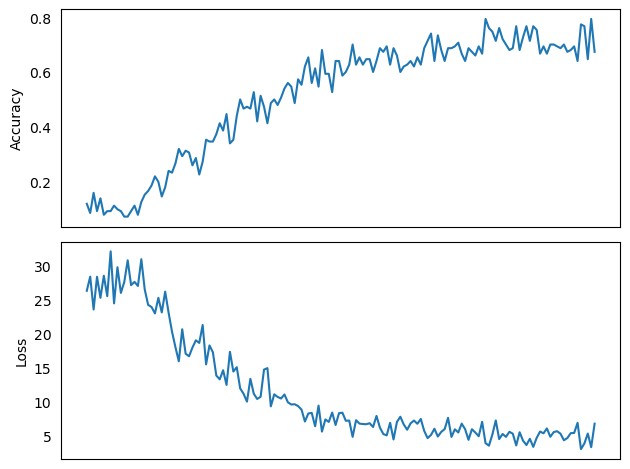

In [5]:
#Create 2 plots stacked vertically
plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(accuracy_list, label='Accuracy')
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax2.plot(loss_list, label='Loss')
ax2.set_ylabel("Loss")

ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

plt.tight_layout() 

print("Training data\nAccuracy: {}, Loss: {}".format(accuracy_list[len(accuracy_list)-1], loss_list[len(loss_list)-1]))

predictions = model.predict(testing_data_X)
print("Testing data\nAccuracy: {0:.4f}".format(calculate_accuracy(predictions, testing_data_Y)), 
      "Loss: {0:.4f}".format(calculate_MSE(predictions, testing_data_Y)))

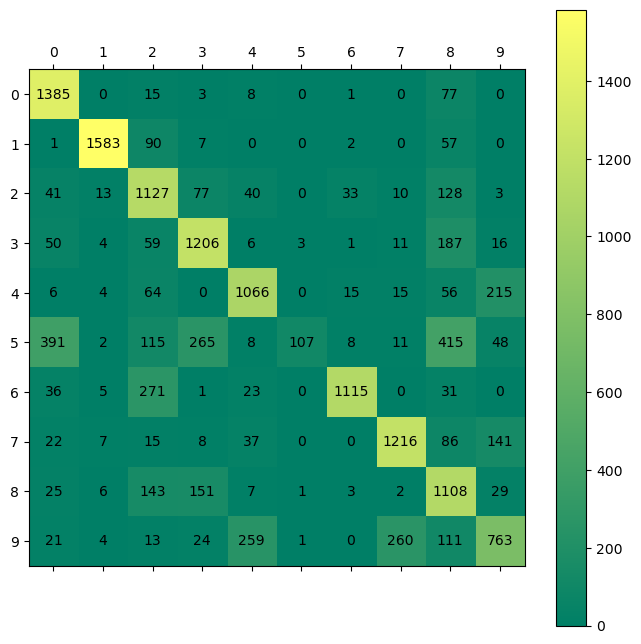

array([[1385,    0,   15,    3,    8,    0,    1,    0,   77,    0],
       [   1, 1583,   90,    7,    0,    0,    2,    0,   57,    0],
       [  41,   13, 1127,   77,   40,    0,   33,   10,  128,    3],
       [  50,    4,   59, 1206,    6,    3,    1,   11,  187,   16],
       [   6,    4,   64,    0, 1066,    0,   15,   15,   56,  215],
       [ 391,    2,  115,  265,    8,  107,    8,   11,  415,   48],
       [  36,    5,  271,    1,   23,    0, 1115,    0,   31,    0],
       [  22,    7,   15,    8,   37,    0,    0, 1216,   86,  141],
       [  25,    6,  143,  151,    7,    1,    3,    2, 1108,   29],
       [  21,    4,   13,   24,  259,    1,    0,  260,  111,  763]])

In [6]:
confusion_matrix(predictions, testing_data_Y)

In [7]:
model_info = pd.DataFrame(columns=["Hidden nodes amount", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

for i in range(10):
    nodes_amount = (i+1)*10
    model = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=nodes_amount, 
                          learning_rate=.001, 
                          activation_function="relu", 
                          seed=seed)

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                                         training_data_Y, 
                                                         epochs=50, batch_size=150, 
                                                         stopping_threshold=-100, dropout_rate=0.5)
    end = process_time()
    
    model_info.loc[model_info.index.size] = [nodes_amount, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]
    

Epoch: 1/50
Iteration: 100 Accuracy: 0.1200 Loss: 26.3333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0867 Loss: 28.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1600 Loss: 23.5600 Computation time: 0.00ms
Epoch computation time: 1.67s

Epoch: 2/50
Iteration: 100 Accuracy: 0.0933 Loss: 28.4067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1400 Loss: 25.2867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0800 Loss: 28.5533 Computation time: 0.00ms
Epoch computation time: 2.23s

Epoch: 3/50
Iteration: 100 Accuracy: 0.0933 Loss: 25.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 32.1533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1133 Loss: 24.4667 Computation time: 0.00ms
Epoch computation time: 2.25s

Epoch: 4/50
Iteration: 100 Accuracy: 0.1000 Loss: 29.8133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 26.0133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 27.6333 Computation time: 0.00ms
Epoch c

Iteration: 100 Accuracy: 0.6867 Loss: 5.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 4.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7400 Loss: 5.0133 Computation time: 0.00ms
Epoch computation time: 2.09s

Epoch: 35/50
Iteration: 100 Accuracy: 0.6400 Loss: 5.9333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7333 Loss: 4.7800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6800 Loss: 5.4667 Computation time: 0.00ms
Epoch computation time: 2.25s

Epoch: 36/50
Iteration: 100 Accuracy: 0.6400 Loss: 5.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6867 Loss: 7.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6867 Loss: 4.7200 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 37/50
Iteration: 100 Accuracy: 0.6933 Loss: 5.8467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7067 Loss: 5.3800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6667 Loss: 6.6867 Computation time: 0.00ms
Epoch computation time: 2.08

Iteration: 300 Accuracy: 0.5933 Loss: 10.1467 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 17/50
Iteration: 100 Accuracy: 0.6333 Loss: 10.6000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6000 Loss: 9.6800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6667 Loss: 8.4267 Computation time: 0.00ms
Epoch computation time: 2.70s

Epoch: 18/50
Iteration: 100 Accuracy: 0.7200 Loss: 6.9867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6733 Loss: 6.0000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6467 Loss: 7.9800 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 19/50
Iteration: 100 Accuracy: 0.7000 Loss: 6.0733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6867 Loss: 7.5400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6400 Loss: 6.7333 Computation time: 0.00ms
Epoch computation time: 2.70s

Epoch: 20/50
Iteration: 100 Accuracy: 0.6600 Loss: 5.9467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6467 Loss: 7.3467 Computa

Iteration: 100 Accuracy: 0.8000 Loss: 3.1333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7733 Loss: 3.6533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7933 Loss: 3.2867 Computation time: 0.00ms
Epoch computation time: 2.69s

Epoch: 50/50
Iteration: 100 Accuracy: 0.7000 Loss: 4.6000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7533 Loss: 3.6800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7467 Loss: 5.1800 Computation time: 0.00ms
Epoch computation time: 2.59s

Epoch: 1/50
Iteration: 100 Accuracy: 0.1867 Loss: 17.3200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 30.6267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 26.6000 Computation time: 93.75ms
Epoch computation time: 3.33s

Epoch: 2/50
Iteration: 100 Accuracy: 0.0933 Loss: 29.4600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 28.7133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0800 Loss: 31.7533 Computation time: 0.00ms
Epoch computation time:

Iteration: 300 Accuracy: 0.6867 Loss: 7.0667 Computation time: 0.00ms
Epoch computation time: 3.23s

Epoch: 32/50
Iteration: 100 Accuracy: 0.7400 Loss: 5.3000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6733 Loss: 5.5600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7933 Loss: 2.4733 Computation time: 0.00ms
Epoch computation time: 3.36s

Epoch: 33/50
Iteration: 100 Accuracy: 0.7333 Loss: 5.0733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 5.2200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7333 Loss: 3.7600 Computation time: 0.00ms
Epoch computation time: 3.19s

Epoch: 34/50
Iteration: 100 Accuracy: 0.7733 Loss: 3.7200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7533 Loss: 4.1333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7667 Loss: 4.3667 Computation time: 93.75ms
Epoch computation time: 3.38s

Epoch: 35/50
Iteration: 100 Accuracy: 0.7800 Loss: 2.9933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8000 Loss: 4.8933 Computat

Iteration: 100 Accuracy: 0.6067 Loss: 10.4267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6800 Loss: 6.8200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6467 Loss: 8.2867 Computation time: 0.00ms
Epoch computation time: 3.77s

Epoch: 15/50
Iteration: 100 Accuracy: 0.6800 Loss: 7.6533 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.6133 Loss: 7.2133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6667 Loss: 6.7133 Computation time: 0.00ms
Epoch computation time: 3.77s

Epoch: 16/50
Iteration: 100 Accuracy: 0.6200 Loss: 7.5000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 9.2000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7133 Loss: 5.8067 Computation time: 0.00ms
Epoch computation time: 3.83s

Epoch: 17/50
Iteration: 100 Accuracy: 0.6933 Loss: 6.0933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6933 Loss: 7.7600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6267 Loss: 8.4933 Computation time: 0.00ms
Epoch computation time: 3.

Iteration: 300 Accuracy: 0.7133 Loss: 4.3467 Computation time: 0.00ms
Epoch computation time: 3.72s

Epoch: 47/50
Iteration: 100 Accuracy: 0.7467 Loss: 5.9000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 3.7000 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.2333 Computation time: 0.00ms
Epoch computation time: 3.97s

Epoch: 48/50
Iteration: 100 Accuracy: 0.7867 Loss: 3.6533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 3.5800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8000 Loss: 2.7133 Computation time: 0.00ms
Epoch computation time: 3.89s

Epoch: 49/50
Iteration: 100 Accuracy: 0.7867 Loss: 4.6733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7600 Loss: 5.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7600 Loss: 4.4067 Computation time: 0.00ms
Epoch computation time: 4.03s

Epoch: 50/50
Iteration: 100 Accuracy: 0.7600 Loss: 3.7400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7733 Loss: 3.3933 Computat

Iteration: 100 Accuracy: 0.7200 Loss: 5.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 4.9600 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.7200 Loss: 5.3267 Computation time: 0.00ms
Epoch computation time: 4.31s

Epoch: 30/50
Iteration: 100 Accuracy: 0.7933 Loss: 3.2333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7400 Loss: 4.4333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7467 Loss: 4.5733 Computation time: 0.00ms
Epoch computation time: 4.36s

Epoch: 31/50
Iteration: 100 Accuracy: 0.7133 Loss: 5.6600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7267 Loss: 4.4467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7400 Loss: 4.9067 Computation time: 0.00ms
Epoch computation time: 4.44s

Epoch: 32/50
Iteration: 100 Accuracy: 0.7200 Loss: 4.8133 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.7200 Loss: 4.9800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7533 Loss: 4.8533 Computation time: 0.00ms
Epoch computation time: 4.

Iteration: 200 Accuracy: 0.5333 Loss: 12.5933 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5267 Loss: 11.4067 Computation time: 0.00ms
Epoch computation time: 5.06s

Epoch: 12/50
Iteration: 100 Accuracy: 0.5400 Loss: 10.1333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6000 Loss: 9.0333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6533 Loss: 7.6933 Computation time: 0.00ms
Epoch computation time: 5.20s

Epoch: 13/50
Iteration: 100 Accuracy: 0.6133 Loss: 8.0000 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.7200 Loss: 6.2133 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.6800 Loss: 6.1533 Computation time: 0.00ms
Epoch computation time: 4.94s

Epoch: 14/50
Iteration: 100 Accuracy: 0.6267 Loss: 9.3467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6133 Loss: 8.4467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6267 Loss: 7.0667 Computation time: 78.12ms
Epoch computation time: 4.92s

Epoch: 15/50
Iteration: 100 Accuracy: 0.6400 Loss: 6.8733 Co

Iteration: 300 Accuracy: 0.8333 Loss: 3.2800 Computation time: 0.00ms
Epoch computation time: 4.81s

Epoch: 44/50
Iteration: 100 Accuracy: 0.8133 Loss: 2.8067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6867 Loss: 4.6667 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.7733 Loss: 3.6200 Computation time: 0.00ms
Epoch computation time: 4.84s

Epoch: 45/50
Iteration: 100 Accuracy: 0.7867 Loss: 3.4600 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.8467 Loss: 1.7733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7000 Loss: 6.0000 Computation time: 46.88ms
Epoch computation time: 4.50s

Epoch: 46/50
Iteration: 100 Accuracy: 0.7733 Loss: 3.5400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7200 Loss: 4.2533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.2667 Computation time: 0.00ms
Epoch computation time: 4.92s

Epoch: 47/50
Iteration: 100 Accuracy: 0.7133 Loss: 4.3867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7400 Loss: 4.6333 Comput

Iteration: 100 Accuracy: 0.6867 Loss: 5.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7467 Loss: 3.1333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7600 Loss: 4.0000 Computation time: 0.00ms
Epoch computation time: 5.62s

Epoch: 27/50
Iteration: 100 Accuracy: 0.7133 Loss: 4.5467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6600 Loss: 5.8333 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.7667 Loss: 4.4133 Computation time: 0.00ms
Epoch computation time: 5.67s

Epoch: 28/50
Iteration: 100 Accuracy: 0.7400 Loss: 4.9467 Computation time: 62.50ms
Iteration: 200 Accuracy: 0.7000 Loss: 3.3333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7267 Loss: 4.3200 Computation time: 0.00ms
Epoch computation time: 5.42s

Epoch: 29/50
Iteration: 100 Accuracy: 0.7600 Loss: 4.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7267 Loss: 5.6200 Computation time: 62.50ms
Iteration: 300 Accuracy: 0.7267 Loss: 5.0667 Computation time: 0.00ms
Epoch computation time: 5

Iteration: 200 Accuracy: 0.2533 Loss: 19.8133 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.3800 Loss: 16.7600 Computation time: 0.00ms
Epoch computation time: 6.03s

Epoch: 9/50
Iteration: 100 Accuracy: 0.4000 Loss: 17.3867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4333 Loss: 13.5800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.3800 Loss: 14.4267 Computation time: 0.00ms
Epoch computation time: 5.97s

Epoch: 10/50
Iteration: 100 Accuracy: 0.4800 Loss: 13.4533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5733 Loss: 10.6267 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5000 Loss: 13.0667 Computation time: 93.75ms
Epoch computation time: 6.05s

Epoch: 11/50
Iteration: 100 Accuracy: 0.6133 Loss: 10.7600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4933 Loss: 11.9867 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.5467 Loss: 12.7133 Computation time: 0.00ms
Epoch computation time: 6.16s

Epoch: 12/50
Iteration: 100 Accuracy: 0.4667 Loss: 12

Iteration: 300 Accuracy: 0.8067 Loss: 4.2267 Computation time: 0.00ms
Epoch computation time: 6.25s

Epoch: 41/50
Iteration: 100 Accuracy: 0.7733 Loss: 4.3467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7733 Loss: 3.4933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7400 Loss: 4.9533 Computation time: 0.00ms
Epoch computation time: 6.20s

Epoch: 42/50
Iteration: 100 Accuracy: 0.8067 Loss: 3.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7933 Loss: 4.4000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8133 Loss: 2.9000 Computation time: 0.00ms
Epoch computation time: 6.30s

Epoch: 43/50
Iteration: 100 Accuracy: 0.7267 Loss: 5.1533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7867 Loss: 3.4000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7533 Loss: 4.6333 Computation time: 0.00ms
Epoch computation time: 6.34s

Epoch: 44/50
Iteration: 100 Accuracy: 0.7867 Loss: 3.0600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8200 Loss: 3.2333 Computati

Iteration: 100 Accuracy: 0.6867 Loss: 5.5200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6400 Loss: 6.0600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7467 Loss: 4.6800 Computation time: 0.00ms
Epoch computation time: 6.38s

Epoch: 24/50
Iteration: 100 Accuracy: 0.7067 Loss: 4.9400 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.7333 Loss: 4.8267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6400 Loss: 6.9533 Computation time: 0.00ms
Epoch computation time: 6.66s

Epoch: 25/50
Iteration: 100 Accuracy: 0.7267 Loss: 5.1400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7533 Loss: 4.9067 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.7133 Loss: 3.7133 Computation time: 0.00ms
Epoch computation time: 6.67s

Epoch: 26/50
Iteration: 100 Accuracy: 0.7267 Loss: 5.6400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 5.3467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7267 Loss: 4.8867 Computation time: 0.00ms
Epoch computation time: 6.

Iteration: 200 Accuracy: 0.2000 Loss: 24.2933 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.1800 Loss: 25.2267 Computation time: 0.00ms
Epoch computation time: 7.36s

Epoch: 6/50
Iteration: 100 Accuracy: 0.2200 Loss: 24.6133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.2533 Loss: 23.4733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.3133 Loss: 17.0933 Computation time: 0.00ms
Epoch computation time: 7.31s

Epoch: 7/50
Iteration: 100 Accuracy: 0.2800 Loss: 19.8333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.2867 Loss: 22.0800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.2600 Loss: 22.3467 Computation time: 0.00ms
Epoch computation time: 7.28s

Epoch: 8/50
Iteration: 100 Accuracy: 0.4133 Loss: 16.3867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4533 Loss: 13.9267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4600 Loss: 15.8800 Computation time: 0.00ms
Epoch computation time: 7.16s

Epoch: 9/50
Iteration: 100 Accuracy: 0.4533 Loss: 16.2533 

Iteration: 300 Accuracy: 0.8000 Loss: 3.0133 Computation time: 0.00ms
Epoch computation time: 6.73s

Epoch: 38/50
Iteration: 100 Accuracy: 0.7200 Loss: 5.4267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7867 Loss: 3.0400 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.7800 Loss: 3.0533 Computation time: 0.00ms
Epoch computation time: 7.05s

Epoch: 39/50
Iteration: 100 Accuracy: 0.7467 Loss: 4.9600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7933 Loss: 3.3533 Computation time: 187.50ms
Iteration: 300 Accuracy: 0.8200 Loss: 2.8200 Computation time: 0.00ms
Epoch computation time: 7.09s

Epoch: 40/50
Iteration: 100 Accuracy: 0.8000 Loss: 2.3867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7333 Loss: 4.8933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7333 Loss: 5.0933 Computation time: 93.75ms
Epoch computation time: 7.08s

Epoch: 41/50
Iteration: 100 Accuracy: 0.8000 Loss: 3.5000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7200 Loss: 4.2067 Compu

<Figure size 640x480 with 0 Axes>

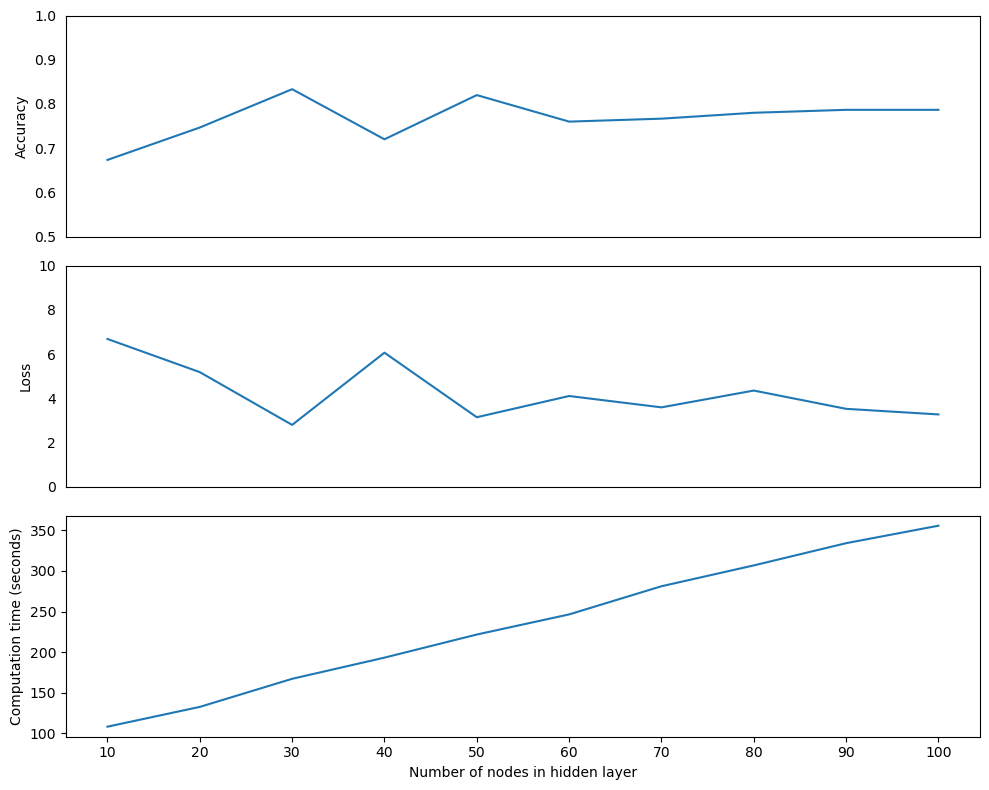

In [8]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Hidden nodes amount"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.set_ylim(0.5, 1)

#Display line chart for loss
ax2.plot(model_info["Hidden nodes amount"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

ax2.set_ylim(0, 10)

#Display line chart for computation time
ax3.plot(model_info["Hidden nodes amount"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

# Set tick interval
loc = ticker.MultipleLocator(base=10) 
ax3.xaxis.set_major_locator(loc)
ax3.set_xlabel("Number of nodes in hidden layer")

plt.tight_layout() 

<Figure size 640x480 with 0 Axes>

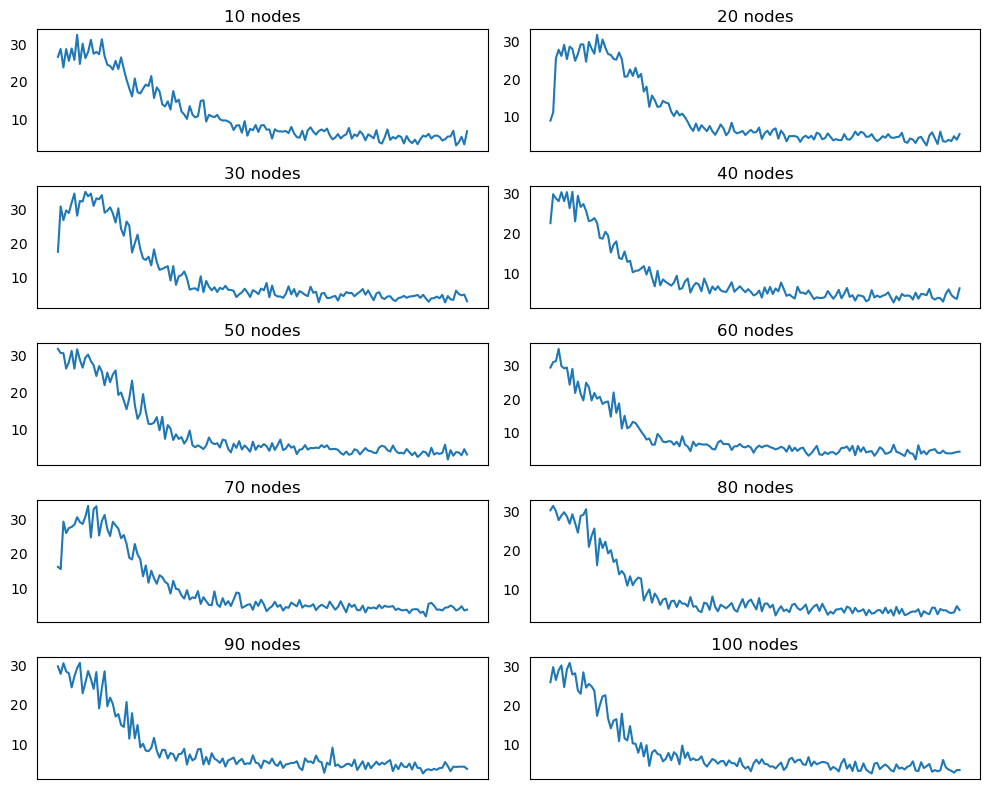

In [9]:
#Create 10 plots
plt.figure()
fig, axes = plt.subplots(5, 2, figsize=(10, 8))

for ax, loss_list, name in zip(axes.flatten(), model_info["Loss list"], model_info["Hidden nodes amount"]):
    ax.plot(loss_list)
    ax.set(title="{} nodes".format(name))
    ax.set_xticklabels([])
    ax.tick_params(tick1On=False)
    loc = ticker.MultipleLocator(base=10) 
    ax.xaxis.set_major_locator(loc)


plt.tight_layout() 

In [10]:
model_info = pd.DataFrame(columns=["Hidden layers amount", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

for i in range(5):
    layers_amount = i+1
    model = NeuralNetwork(hidden_layers_amount=layers_amount, 
                          hidden_nodes_amount=25, 
                          learning_rate=.001, 
                          activation_function="relu", 
                          seed=seed)

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                                         training_data_Y, 
                                                         epochs=50, batch_size=150, 
                                                         stopping_threshold=-100, dropout_rate=0.5)
    end = process_time()
    
    model_info.loc[model_info.index.size] = [layers_amount, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/50
Iteration: 100 Accuracy: 0.1133 Loss: 19.6867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 16.7000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 16.9800 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 2/50
Iteration: 100 Accuracy: 0.1800 Loss: 16.5733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.2867 Loss: 17.0933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1133 Loss: 25.0133 Computation time: 0.00ms
Epoch computation time: 3.14s

Epoch: 3/50
Iteration: 100 Accuracy: 0.1933 Loss: 23.6333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0800 Loss: 30.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0800 Loss: 32.6933 Computation time: 0.00ms
Epoch computation time: 3.03s

Epoch: 4/50
Iteration: 100 Accuracy: 0.0400 Loss: 31.5733 Computation time: 62.50ms
Iteration: 200 Accuracy: 0.1067 Loss: 24.3467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 27.5067 Computation time: 0.00ms
Epoch 

Iteration: 300 Accuracy: 0.7467 Loss: 3.8533 Computation time: 0.00ms
Epoch computation time: 2.75s

Epoch: 34/50
Iteration: 100 Accuracy: 0.7400 Loss: 4.3667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7600 Loss: 4.6333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.5000 Computation time: 0.00ms
Epoch computation time: 2.86s

Epoch: 35/50
Iteration: 100 Accuracy: 0.7067 Loss: 3.3133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7533 Loss: 3.4733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7067 Loss: 5.0600 Computation time: 0.00ms
Epoch computation time: 3.00s

Epoch: 36/50
Iteration: 100 Accuracy: 0.7800 Loss: 4.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 3.8200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7200 Loss: 4.9800 Computation time: 93.75ms
Epoch computation time: 2.69s

Epoch: 37/50
Iteration: 100 Accuracy: 0.7400 Loss: 3.9067 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.7600 Loss: 3.6667 Computa

Iteration: 100 Accuracy: 0.1133 Loss: 28.8400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0600 Loss: 29.5200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 28.7733 Computation time: 0.00ms
Epoch computation time: 4.75s

Epoch: 17/50
Iteration: 100 Accuracy: 0.0933 Loss: 33.8800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 26.8200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 27.6000 Computation time: 0.00ms
Epoch computation time: 4.52s

Epoch: 18/50
Iteration: 100 Accuracy: 0.1067 Loss: 26.7200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 30.0000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 30.3000 Computation time: 0.00ms
Epoch computation time: 4.52s

Epoch: 19/50
Iteration: 100 Accuracy: 0.1133 Loss: 24.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0600 Loss: 30.3000 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.1000 Loss: 29.1800 Computation time: 0.00ms
Epoch computati

Iteration: 100 Accuracy: 0.0800 Loss: 28.3133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 23.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 31.1600 Computation time: 0.00ms
Epoch computation time: 4.70s

Epoch: 49/50
Iteration: 100 Accuracy: 0.1200 Loss: 27.1267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0667 Loss: 27.3200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1400 Loss: 26.7533 Computation time: 0.00ms
Epoch computation time: 4.69s

Epoch: 50/50
Iteration: 100 Accuracy: 0.0933 Loss: 28.1133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1333 Loss: 30.6333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0667 Loss: 30.5067 Computation time: 93.75ms
Epoch computation time: 4.66s

Epoch: 1/50
Iteration: 100 Accuracy: 0.1000 Loss: 27.7200 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.1000 Loss: 27.1600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 29.4600 Computation time: 78.12ms
Epoch computat

Iteration: 100 Accuracy: 0.1067 Loss: 28.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1200 Loss: 28.2467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1333 Loss: 26.4267 Computation time: 0.00ms
Epoch computation time: 6.23s

Epoch: 31/50
Iteration: 100 Accuracy: 0.0667 Loss: 24.1467 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.0400 Loss: 29.8733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 29.2533 Computation time: 0.00ms
Epoch computation time: 6.22s

Epoch: 32/50
Iteration: 100 Accuracy: 0.0800 Loss: 32.8667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1333 Loss: 24.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0533 Loss: 30.1533 Computation time: 0.00ms
Epoch computation time: 6.27s

Epoch: 33/50
Iteration: 100 Accuracy: 0.1000 Loss: 25.5467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 26.8467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1267 Loss: 29.1800 Computation time: 0.00ms
Epoch computati

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.1000 Loss: 9.3200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0733 Loss: 31.5133 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.0933 Loss: 29.2200 Computation time: 0.00ms
Epoch computation time: 7.22s

Epoch: 2/50
Iteration: 100 Accuracy: 0.1200 Loss: 28.1333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0867 Loss: 29.6933 Computation time: 46.88ms
Iteration: 300 Accuracy: 0.1200 Loss: 24.8733 Computation time: 0.00ms
Epoch computation time: 7.44s

Epoch: 3/50
Iteration: 100 Accuracy: 0.0733 Loss: 27.5200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1267 Loss: 29.8267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 26.2133 Computation time: 0.00ms
Epoch computation time: 7.64s

Epoch: 4/50
Iteration: 100 Accuracy: 0.0933 Loss: 28.0667 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.1467 Loss: 27.9333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0400 Loss: 31.6200 Computation time: 0.00ms
Epoch computation

Iteration: 100 Accuracy: 0.0733 Loss: 28.5600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 28.1933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 25.0400 Computation time: 0.00ms
Epoch computation time: 8.14s

Epoch: 34/50
Iteration: 100 Accuracy: 0.1133 Loss: 26.4267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 30.1133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 30.8067 Computation time: 0.00ms
Epoch computation time: 7.94s

Epoch: 35/50
Iteration: 100 Accuracy: 0.0800 Loss: 29.6133 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.0533 Loss: 30.1200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1333 Loss: 24.5533 Computation time: 62.50ms
Epoch computation time: 7.81s

Epoch: 36/50
Iteration: 100 Accuracy: 0.1067 Loss: 25.4733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 28.2267 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.0733 Loss: 31.0600 Computation time: 0.00ms
Epoch computa

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.1000 Loss: 29.9933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0733 Loss: 31.6533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 27.9800 Computation time: 0.00ms
Epoch computation time: 9.47s

Epoch: 2/50
Iteration: 100 Accuracy: 0.0533 Loss: 30.4800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0867 Loss: 30.2867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 22.6000 Computation time: 93.75ms
Epoch computation time: 9.53s

Epoch: 3/50
Iteration: 100 Accuracy: 0.1467 Loss: 29.5133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1000 Loss: 26.6867 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.0667 Loss: 28.7333 Computation time: 62.50ms
Epoch computation time: 9.22s

Epoch: 4/50
Iteration: 100 Accuracy: 0.1533 Loss: 27.4000 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.0867 Loss: 33.1867 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.1333 Loss: 26.8800 Computation time: 93.75ms
Epoch computa

Iteration: 100 Accuracy: 0.0867 Loss: 28.2600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1400 Loss: 24.9400 Computation time: 31.25ms
Iteration: 300 Accuracy: 0.1200 Loss: 23.2000 Computation time: 0.00ms
Epoch computation time: 9.17s

Epoch: 34/50
Iteration: 100 Accuracy: 0.1400 Loss: 28.4067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0867 Loss: 27.0600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0800 Loss: 28.0800 Computation time: 0.00ms
Epoch computation time: 9.41s

Epoch: 35/50
Iteration: 100 Accuracy: 0.0800 Loss: 29.5800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1267 Loss: 25.3000 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.0933 Loss: 26.0467 Computation time: 0.00ms
Epoch computation time: 9.44s

Epoch: 36/50
Iteration: 100 Accuracy: 0.0933 Loss: 27.2000 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.0800 Loss: 28.6200 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.0933 Loss: 26.6200 Computation time: 0.00ms
Epoch comput

<Figure size 640x480 with 0 Axes>

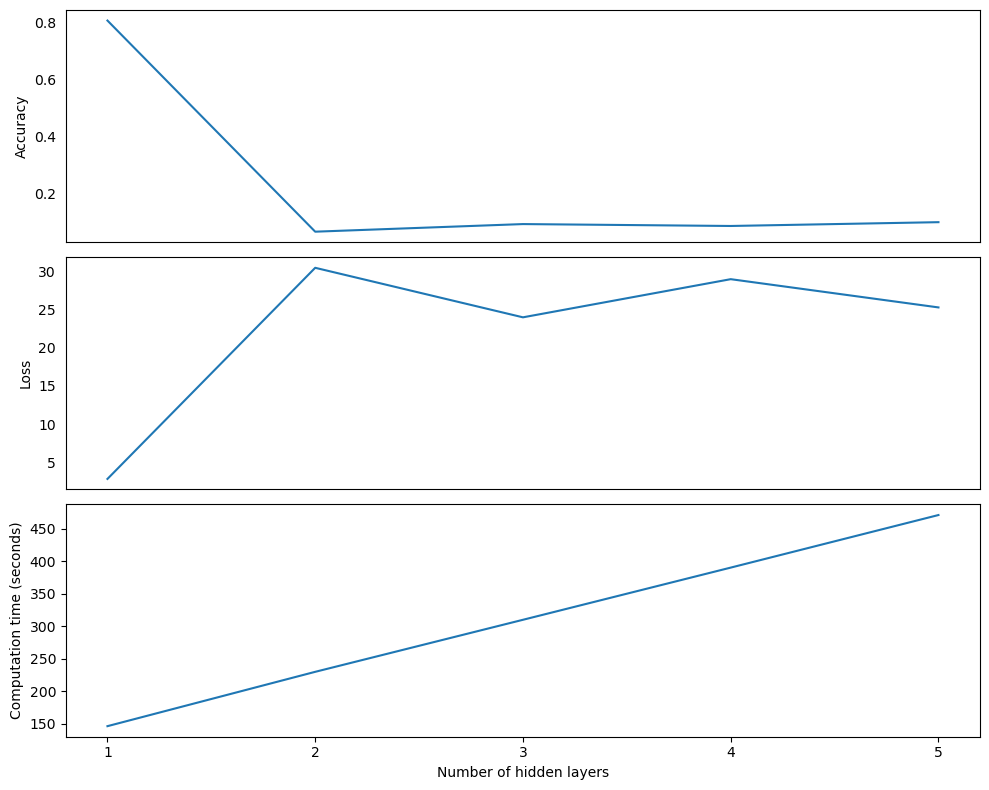

In [11]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Hidden layers amount"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Hidden layers amount"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Hidden layers amount"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

# Set tick interval
loc = ticker.MultipleLocator(base=1) 
ax3.xaxis.set_major_locator(loc)
ax3.set_xlabel("Number of hidden layers")

plt.tight_layout() 

In [12]:
model_info = pd.DataFrame(columns=["Learning rate", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

learning_rates = [.001, .005, .01, .02, .05, .1, .2]
for learning_rate in learning_rates:
    model = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=learning_rate, 
                          activation_function="relu", 
                          seed=seed)

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                                         training_data_Y, 
                                                         epochs=50, batch_size=150, 
                                                         stopping_threshold=-100, dropout_rate=0.5)
    end = process_time()
    
    model_info.loc[model_info.index.size] = [learning_rate, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/50
Iteration: 100 Accuracy: 0.1133 Loss: 19.6867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 16.7000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 16.9800 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 2/50
Iteration: 100 Accuracy: 0.1800 Loss: 16.5733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.2867 Loss: 17.0933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1133 Loss: 25.0133 Computation time: 93.75ms
Epoch computation time: 3.05s

Epoch: 3/50
Iteration: 100 Accuracy: 0.1933 Loss: 23.6333 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.0800 Loss: 30.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0800 Loss: 32.6933 Computation time: 0.00ms
Epoch computation time: 3.03s

Epoch: 4/50
Iteration: 100 Accuracy: 0.0400 Loss: 31.5733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 24.3467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1067 Loss: 27.5067 Computation time: 0.00ms
Epoch

Iteration: 300 Accuracy: 0.7467 Loss: 3.8533 Computation time: 0.00ms
Epoch computation time: 3.00s

Epoch: 34/50
Iteration: 100 Accuracy: 0.7400 Loss: 4.3667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7600 Loss: 4.6333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.5000 Computation time: 0.00ms
Epoch computation time: 2.95s

Epoch: 35/50
Iteration: 100 Accuracy: 0.7067 Loss: 3.3133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7533 Loss: 3.4733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7067 Loss: 5.0600 Computation time: 0.00ms
Epoch computation time: 3.00s

Epoch: 36/50
Iteration: 100 Accuracy: 0.7800 Loss: 4.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 3.8200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7200 Loss: 4.9800 Computation time: 0.00ms
Epoch computation time: 2.97s

Epoch: 37/50
Iteration: 100 Accuracy: 0.7400 Loss: 3.9067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7600 Loss: 3.6667 Computati

Iteration: 100 Accuracy: 0.7800 Loss: 3.3267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7467 Loss: 4.6000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8333 Loss: 3.0000 Computation time: 0.00ms
Epoch computation time: 3.03s

Epoch: 17/50
Iteration: 100 Accuracy: 0.8533 Loss: 1.7133 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.8067 Loss: 2.7267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.1067 Computation time: 0.00ms
Epoch computation time: 3.16s

Epoch: 18/50
Iteration: 100 Accuracy: 0.8000 Loss: 3.4733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 4.2267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7467 Loss: 4.5533 Computation time: 0.00ms
Epoch computation time: 2.84s

Epoch: 19/50
Iteration: 100 Accuracy: 0.8133 Loss: 2.6867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8267 Loss: 2.6933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7667 Loss: 3.6867 Computation time: 93.75ms
Epoch computation time: 3.

Iteration: 300 Accuracy: 0.8600 Loss: 2.6867 Computation time: 93.75ms
Epoch computation time: 3.12s

Epoch: 49/50
Iteration: 100 Accuracy: 0.8000 Loss: 3.1200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8333 Loss: 3.0533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8200 Loss: 3.6467 Computation time: 0.00ms
Epoch computation time: 2.91s

Epoch: 50/50
Iteration: 100 Accuracy: 0.8867 Loss: 1.6800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8400 Loss: 2.8133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 2.2867 Computation time: 0.00ms
Epoch computation time: 2.91s

Epoch: 1/50
Iteration: 100 Accuracy: 0.1133 Loss: 28.2067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1600 Loss: 23.8333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.3200 Loss: 19.9067 Computation time: 0.00ms
Epoch computation time: 2.83s

Epoch: 2/50
Iteration: 100 Accuracy: 0.6267 Loss: 6.2000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6800 Loss: 8.2267 Computa

Iteration: 100 Accuracy: 0.8533 Loss: 2.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8067 Loss: 2.2000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8133 Loss: 3.0467 Computation time: 0.00ms
Epoch computation time: 2.72s

Epoch: 32/50
Iteration: 100 Accuracy: 0.8333 Loss: 2.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8400 Loss: 2.7667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8467 Loss: 1.8200 Computation time: 0.00ms
Epoch computation time: 3.08s

Epoch: 33/50
Iteration: 100 Accuracy: 0.8333 Loss: 3.1800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7867 Loss: 3.9000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 2.3400 Computation time: 62.50ms
Epoch computation time: 2.88s

Epoch: 34/50
Iteration: 100 Accuracy: 0.8267 Loss: 2.8800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8600 Loss: 2.4867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 2.4667 Computation time: 0.00ms
Epoch computation time: 2.9

Iteration: 300 Accuracy: 0.8067 Loss: 3.2600 Computation time: 0.00ms
Epoch computation time: 2.88s

Epoch: 14/50
Iteration: 100 Accuracy: 0.8400 Loss: 1.7400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8000 Loss: 4.0000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8133 Loss: 3.1867 Computation time: 0.00ms
Epoch computation time: 2.92s

Epoch: 15/50
Iteration: 100 Accuracy: 0.8200 Loss: 2.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8333 Loss: 2.8867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8667 Loss: 2.8800 Computation time: 62.50ms
Epoch computation time: 3.00s

Epoch: 16/50
Iteration: 100 Accuracy: 0.8467 Loss: 2.2333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7800 Loss: 4.1467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8467 Loss: 2.2400 Computation time: 0.00ms
Epoch computation time: 2.67s

Epoch: 17/50
Iteration: 100 Accuracy: 0.8733 Loss: 1.4467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7600 Loss: 3.8067 Computat

Iteration: 100 Accuracy: 0.7667 Loss: 5.4267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6533 Loss: 6.4867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7800 Loss: 4.3800 Computation time: 0.00ms
Epoch computation time: 2.94s

Epoch: 47/50
Iteration: 100 Accuracy: 0.7467 Loss: 3.8867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7467 Loss: 5.2200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8600 Loss: 2.8667 Computation time: 0.00ms
Epoch computation time: 2.86s

Epoch: 48/50
Iteration: 100 Accuracy: 0.7467 Loss: 4.4267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8467 Loss: 1.8867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8267 Loss: 3.2000 Computation time: 93.75ms
Epoch computation time: 3.06s

Epoch: 49/50
Iteration: 100 Accuracy: 0.7200 Loss: 5.6600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8000 Loss: 3.8267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6400 Loss: 6.1600 Computation time: 0.00ms
Epoch computation time: 3.0

Iteration: 300 Accuracy: 0.7800 Loss: 3.4667 Computation time: 0.00ms
Epoch computation time: 3.00s

Epoch: 29/50
Iteration: 100 Accuracy: 0.7133 Loss: 5.2733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6467 Loss: 7.4067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8133 Loss: 3.0600 Computation time: 0.00ms
Epoch computation time: 2.98s

Epoch: 30/50
Iteration: 100 Accuracy: 0.7600 Loss: 5.2333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7133 Loss: 4.5400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7533 Loss: 3.8867 Computation time: 0.00ms
Epoch computation time: 2.97s

Epoch: 31/50
Iteration: 100 Accuracy: 0.7933 Loss: 3.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8267 Loss: 2.1000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6400 Loss: 5.5600 Computation time: 0.00ms
Epoch computation time: 3.03s

Epoch: 32/50
Iteration: 100 Accuracy: 0.7733 Loss: 3.1867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7200 Loss: 3.6600 Computati

Iteration: 100 Accuracy: 0.7933 Loss: 3.3933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7400 Loss: 3.0267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8533 Loss: 2.5667 Computation time: 93.75ms
Epoch computation time: 2.94s

Epoch: 12/50
Iteration: 100 Accuracy: 0.8533 Loss: 2.0933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8333 Loss: 2.1133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8467 Loss: 2.6800 Computation time: 0.00ms
Epoch computation time: 3.16s

Epoch: 13/50
Iteration: 100 Accuracy: 0.8467 Loss: 2.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8467 Loss: 2.4600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8000 Loss: 3.6267 Computation time: 0.00ms
Epoch computation time: 2.94s

Epoch: 14/50
Iteration: 100 Accuracy: 0.8133 Loss: 3.0867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6733 Loss: 6.0067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7867 Loss: 3.3800 Computation time: 0.00ms
Epoch computation time: 2.8

Iteration: 300 Accuracy: 0.8867 Loss: 1.9400 Computation time: 93.75ms
Epoch computation time: 3.14s

Epoch: 44/50
Iteration: 100 Accuracy: 0.8933 Loss: 1.2733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8067 Loss: 2.3533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8000 Loss: 2.1600 Computation time: 0.00ms
Epoch computation time: 2.84s

Epoch: 45/50
Iteration: 100 Accuracy: 0.8467 Loss: 1.9800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 1.5733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7733 Loss: 5.1000 Computation time: 0.00ms
Epoch computation time: 3.08s

Epoch: 46/50
Iteration: 100 Accuracy: 0.7733 Loss: 5.1867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8200 Loss: 3.0000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8867 Loss: 1.2933 Computation time: 0.00ms
Epoch computation time: 2.98s

Epoch: 47/50
Iteration: 100 Accuracy: 0.8400 Loss: 2.1800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9333 Loss: 1.0467 Computat

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.7267 Loss: 4.6933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9067 Loss: 0.7600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9200 Loss: 1.6000 Computation time: 0.00ms
Epoch computation time: 2.98s

Epoch: 21/50
Iteration: 100 Accuracy: 0.9067 Loss: 1.8200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8267 Loss: 2.0533 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.8133 Loss: 1.9000 Computation time: 0.00ms
Epoch computation time: 3.11s

Epoch: 22/50
Iteration: 100 Accuracy: 0.1000 Loss: 27.8933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1133 Loss: 25.7067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 27.8933 Computation time: 93.75ms
Epoch computation time: 3.02s

Epoch: 23/50
Iteration: 100 Accuracy: 0.0867 Loss: 28.0267 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.1533 Loss: 26.8533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 28.3133 Computation time: 0.00ms
Epoch computation t

<Figure size 640x480 with 0 Axes>

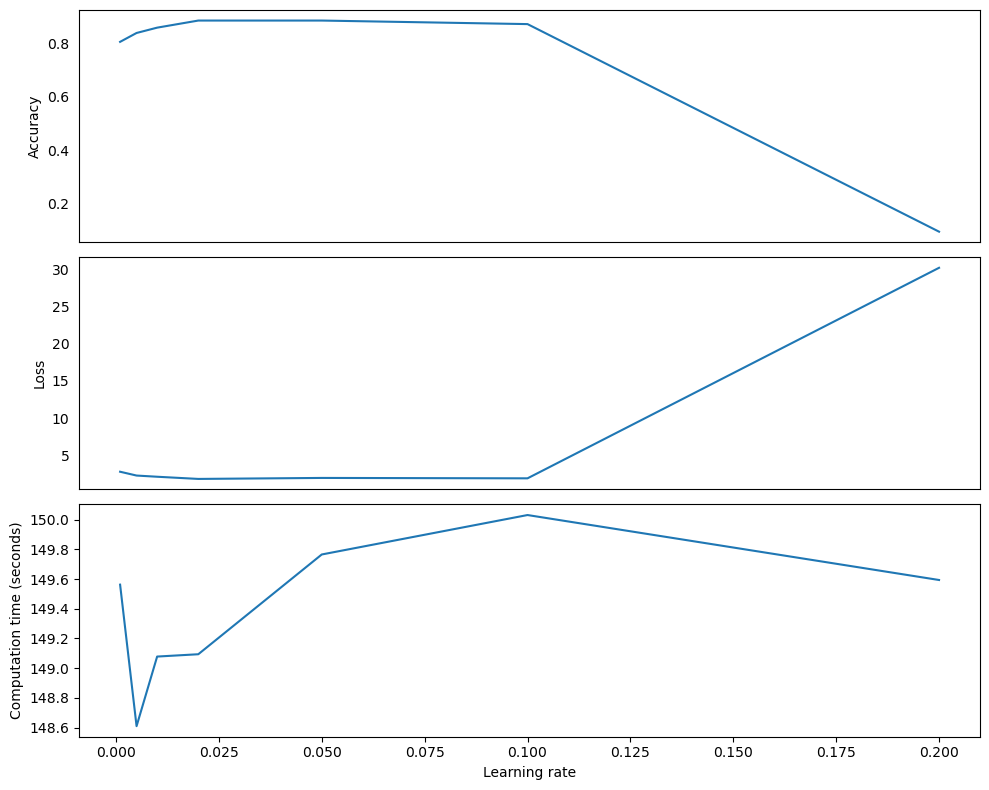

In [13]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Learning rate"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Learning rate"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Learning rate"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Learning rate")

plt.tight_layout() 

In [14]:
model_info = pd.DataFrame(columns=["Dropout rate", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

for i in range(5):
    dropout_rate = (i+2)*0.1
    model = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.25, 
                          activation_function="relu", 
                          seed=seed)

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                                         training_data_Y, 
                                                         epochs=50, batch_size=150, 
                                                         stopping_threshold=-100, dropout_rate=dropout_rate)
    end = process_time()
    
    model_info.loc[model_info.index.size] = [dropout_rate, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/50
Iteration: 100 Accuracy: 0.8333 Loss: 2.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8200 Loss: 2.8733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9200 Loss: 0.7267 Computation time: 0.00ms
Epoch computation time: 1.97s

Epoch: 2/50
Iteration: 100 Accuracy: 0.8133 Loss: 3.6667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9333 Loss: 1.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 1.3000 Computation time: 0.00ms
Epoch computation time: 2.36s

Epoch: 3/50
Iteration: 100 Accuracy: 0.9133 Loss: 1.3467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8800 Loss: 1.9600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 2.0533 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 4/50
Iteration: 100 Accuracy: 0.9133 Loss: 1.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.3733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.0133 Computation time: 0.00ms
Epoch computation t

Iteration: 300 Accuracy: 0.9800 Loss: 0.3000 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 34/50
Iteration: 100 Accuracy: 0.8067 Loss: 3.8067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9600 Loss: 1.1133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9800 Loss: 0.3533 Computation time: 0.00ms
Epoch computation time: 2.42s

Epoch: 35/50
Iteration: 100 Accuracy: 0.9400 Loss: 0.9933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9533 Loss: 0.7000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9333 Loss: 1.0600 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 36/50
Iteration: 100 Accuracy: 0.9067 Loss: 1.7200 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.9067 Loss: 2.3400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9267 Loss: 0.4133 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 37/50
Iteration: 100 Accuracy: 0.9600 Loss: 1.3333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9467 Loss: 1.3067 Computat

Iteration: 100 Accuracy: 0.9200 Loss: 0.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9267 Loss: 0.9867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8867 Loss: 2.2867 Computation time: 0.00ms
Epoch computation time: 2.83s

Epoch: 17/50
Iteration: 100 Accuracy: 0.9733 Loss: 0.5267 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.9267 Loss: 1.2267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8600 Loss: 2.5133 Computation time: 0.00ms
Epoch computation time: 2.81s

Epoch: 18/50
Iteration: 100 Accuracy: 0.8267 Loss: 4.1000 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.8800 Loss: 1.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 2.4467 Computation time: 0.00ms
Epoch computation time: 2.66s

Epoch: 19/50
Iteration: 100 Accuracy: 0.8467 Loss: 4.1467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9267 Loss: 1.0000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9333 Loss: 0.7267 Computation time: 0.00ms
Epoch computation time: 2.

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.1067 Loss: 28.8467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0733 Loss: 29.3667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1267 Loss: 26.9800 Computation time: 0.00ms
Epoch computation time: 2.77s

Epoch: 49/50
Iteration: 100 Accuracy: 0.0867 Loss: 30.2533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 30.5267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 28.6267 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 50/50
Iteration: 100 Accuracy: 0.1533 Loss: 28.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1333 Loss: 23.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0933 Loss: 30.2000 Computation time: 0.00ms
Epoch computation time: 2.83s

Epoch: 1/50
Iteration: 100 Accuracy: 0.7000 Loss: 6.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8067 Loss: 3.7533 Computation time: 62.50ms
Iteration: 300 Accuracy: 0.8733 Loss: 1.5067 Computation time: 0.00ms
Epoch computation t

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.8333 Loss: 2.9600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8467 Loss: 2.5667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1267 Loss: 28.9333 Computation time: 0.00ms
Epoch computation time: 2.84s

Epoch: 26/50
Iteration: 100 Accuracy: 0.1333 Loss: 26.4000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0733 Loss: 25.6733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0667 Loss: 33.5600 Computation time: 0.00ms
Epoch computation time: 2.97s

Epoch: 27/50
Iteration: 100 Accuracy: 0.1267 Loss: 27.3800 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.1267 Loss: 26.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1400 Loss: 28.5000 Computation time: 0.00ms
Epoch computation time: 2.97s

Epoch: 28/50
Iteration: 100 Accuracy: 0.1133 Loss: 29.0333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 30.3933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 27.6067 Computation time: 0.00ms
Epoch computation

Iteration: 100 Accuracy: 0.7800 Loss: 2.3000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8667 Loss: 1.7267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8933 Loss: 1.4000 Computation time: 0.00ms
Epoch computation time: 2.92s

Epoch: 8/50
Iteration: 100 Accuracy: 0.7200 Loss: 4.0533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8133 Loss: 3.4667 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.2533 Computation time: 0.00ms
Epoch computation time: 3.00s

Epoch: 9/50
Iteration: 100 Accuracy: 0.7733 Loss: 3.1600 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.8000 Loss: 3.2867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7333 Loss: 4.4467 Computation time: 0.00ms
Epoch computation time: 3.12s

Epoch: 10/50
Iteration: 100 Accuracy: 0.8600 Loss: 1.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8200 Loss: 2.7667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8667 Loss: 1.9133 Computation time: 0.00ms
Epoch computation time: 2.97

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 100 Accuracy: 0.0733 Loss: 28.6133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1000 Loss: 26.8333 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.1000 Loss: 29.7267 Computation time: 0.00ms
Epoch computation time: 3.16s

Epoch: 16/50
Iteration: 100 Accuracy: 0.1333 Loss: 26.3333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1000 Loss: 31.5133 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.1333 Loss: 25.2200 Computation time: 0.00ms
Epoch computation time: 2.88s

Epoch: 17/50
Iteration: 100 Accuracy: 0.1067 Loss: 27.4933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 28.3133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 27.7933 Computation time: 0.00ms
Epoch computation time: 2.89s

Epoch: 18/50
Iteration: 100 Accuracy: 0.0733 Loss: 31.6267 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.0733 Loss: 29.7467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0733 Loss: 30.3867 Computation time: 0.00ms
Epoch computa

Iteration: 100 Accuracy: 0.1333 Loss: 24.5267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1067 Loss: 27.5533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0933 Loss: 25.6600 Computation time: 0.00ms
Epoch computation time: 3.16s

Epoch: 48/50
Iteration: 100 Accuracy: 0.1067 Loss: 28.8467 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.0733 Loss: 29.3667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1267 Loss: 26.9800 Computation time: 0.00ms
Epoch computation time: 2.75s

Epoch: 49/50
Iteration: 100 Accuracy: 0.0867 Loss: 30.2533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 30.5267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0867 Loss: 28.6267 Computation time: 0.00ms
Epoch computation time: 2.94s

Epoch: 50/50
Iteration: 100 Accuracy: 0.1533 Loss: 28.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1333 Loss: 23.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0933 Loss: 30.2000 Computation time: 0.00ms
Epoch computati

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(inputs) / sum(np.exp(inputs))
C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:23: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(inputs) / sum(np.exp(inputs))


Iteration: 300 Accuracy: 0.8200 Loss: 2.4867 Computation time: 0.00ms
Epoch computation time: 3.34s

Epoch: 8/50
Iteration: 100 Accuracy: 0.6067 Loss: 8.9667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0800 Loss: 30.5133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0933 Loss: 25.7200 Computation time: 0.00ms
Epoch computation time: 3.47s

Epoch: 9/50
Iteration: 100 Accuracy: 0.0733 Loss: 30.4400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 26.7133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 24.1533 Computation time: 0.00ms
Epoch computation time: 3.08s

Epoch: 10/50
Iteration: 100 Accuracy: 0.0933 Loss: 28.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0733 Loss: 27.6733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1200 Loss: 26.0000 Computation time: 0.00ms
Epoch computation time: 3.28s

Epoch: 11/50
Iteration: 100 Accuracy: 0.0667 Loss: 30.8867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1400 Loss: 25.8200 C

Iteration: 300 Accuracy: 0.0867 Loss: 29.8933 Computation time: 62.50ms
Epoch computation time: 3.31s

Epoch: 40/50
Iteration: 100 Accuracy: 0.0800 Loss: 31.7067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1667 Loss: 28.8000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.1533 Loss: 25.6533 Computation time: 0.00ms
Epoch computation time: 3.16s

Epoch: 41/50
Iteration: 100 Accuracy: 0.0933 Loss: 27.6467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.1000 Loss: 26.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.0533 Loss: 31.4467 Computation time: 0.00ms
Epoch computation time: 3.06s

Epoch: 42/50
Iteration: 100 Accuracy: 0.1200 Loss: 28.3000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0933 Loss: 29.2333 Computation time: 46.88ms
Iteration: 300 Accuracy: 0.1067 Loss: 28.7667 Computation time: 0.00ms
Epoch computation time: 3.08s

Epoch: 43/50
Iteration: 100 Accuracy: 0.1000 Loss: 30.9200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.0333 Loss: 26.

<Figure size 640x480 with 0 Axes>

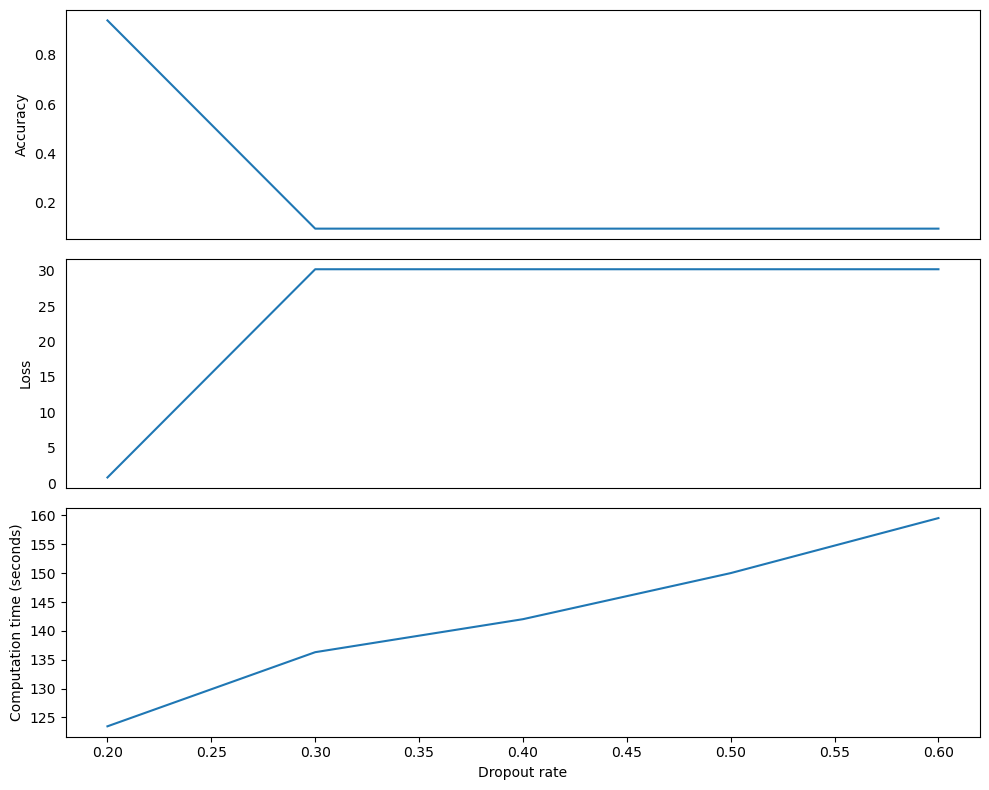

In [15]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Dropout rate"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Dropout rate"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Dropout rate"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Dropout rate")

plt.tight_layout() 

In [16]:
model_info = pd.DataFrame(columns=["Stopping threshold", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

thresholds = [.0001, .001, .005, .01, .05, .1]
seed = 0
for stopping_threshold in thresholds:
    model = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.25, 
                          activation_function="relu", 
                          seed=seed)
    seed += 1

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                                         training_data_Y, 
                                                         epochs=50, batch_size=150, 
                                                         stopping_threshold=stopping_threshold, dropout_rate=0.2)
    end = process_time()
    
    model_info.loc[model_info.index.size] = [stopping_threshold, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/50
Iteration: 100 Accuracy: 0.8733 Loss: 2.0667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8533 Loss: 2.0533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 1.6133 Computation time: 0.00ms
Epoch computation time: 1.89s

Epoch: 2/50
Iteration: 100 Accuracy: 0.8733 Loss: 1.6000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.0133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9267 Loss: 1.1533 Computation time: 0.00ms
Epoch computation time: 2.55s

Epoch: 3/50
Iteration: 100 Accuracy: 0.9600 Loss: 0.3667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9200 Loss: 1.2800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8467 Loss: 2.5333 Computation time: 0.00ms
Epoch computation time: 2.61s

Epoch: 4/50
Iteration: 100 Accuracy: 0.9333 Loss: 0.5733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.0933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8933 Loss: 1.6600 Computation time: 62.50ms
Epoch computation 

Iteration: 100 Accuracy: 0.9400 Loss: 1.1000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9267 Loss: 1.3133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9600 Loss: 0.2400 Computation time: 0.00ms
Epoch computation time: 2.61s

Epoch: 18/50
Iteration: 100 Accuracy: 0.9333 Loss: 1.4133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9400 Loss: 0.7933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8667 Loss: 3.0800 Computation time: 0.00ms
Early stopping | Epoch: 17/50
Accuracy: 0.8667 Loss: 3.0800
Epoch: 1/50
Iteration: 100 Accuracy: 0.8867 Loss: 1.9933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9200 Loss: 1.8267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9133 Loss: 1.3400 Computation time: 0.00ms
Epoch computation time: 2.38s

Epoch: 2/50
Iteration: 100 Accuracy: 0.9267 Loss: 1.5133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9333 Loss: 0.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.8067 Computation time: 0.00ms
E

Iteration: 300 Accuracy: 0.9600 Loss: 0.3667 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 15/50
Iteration: 100 Accuracy: 0.9400 Loss: 0.6933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9533 Loss: 1.1467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9533 Loss: 0.6000 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 16/50
Iteration: 100 Accuracy: 0.9267 Loss: 1.5067 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.9133 Loss: 0.9333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9400 Loss: 0.9200 Computation time: 0.00ms
Epoch computation time: 2.42s

Epoch: 17/50
Iteration: 100 Accuracy: 0.9333 Loss: 1.5467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9400 Loss: 1.5400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9533 Loss: 0.9067 Computation time: 0.00ms
Early stopping | Epoch: 16/50
Accuracy: 0.9533 Loss: 0.9067
Epoch: 1/50
Iteration: 100 Accuracy: 0.9067 Loss: 2.2667 Computation time: 0.00ms
Iteration: 200 Accuracy: 

Iteration: 200 Accuracy: 0.9800 Loss: 0.3400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9667 Loss: 0.6333 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 14/50
Iteration: 100 Accuracy: 0.9467 Loss: 0.9600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9600 Loss: 0.2800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9400 Loss: 1.0400 Computation time: 0.00ms
Epoch computation time: 2.25s

Epoch: 15/50
Iteration: 100 Accuracy: 0.9600 Loss: 1.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9600 Loss: 0.5467 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.9133 Loss: 1.3600 Computation time: 0.00ms
Epoch computation time: 2.62s

Epoch: 16/50
Iteration: 100 Accuracy: 0.9467 Loss: 0.6800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9333 Loss: 1.0933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9333 Loss: 1.3800 Computation time: 0.00ms
Epoch computation time: 2.28s

Epoch: 17/50
Iteration: 100 Accuracy: 0.9600 Loss: 0.8733 Computat

<Figure size 640x480 with 0 Axes>

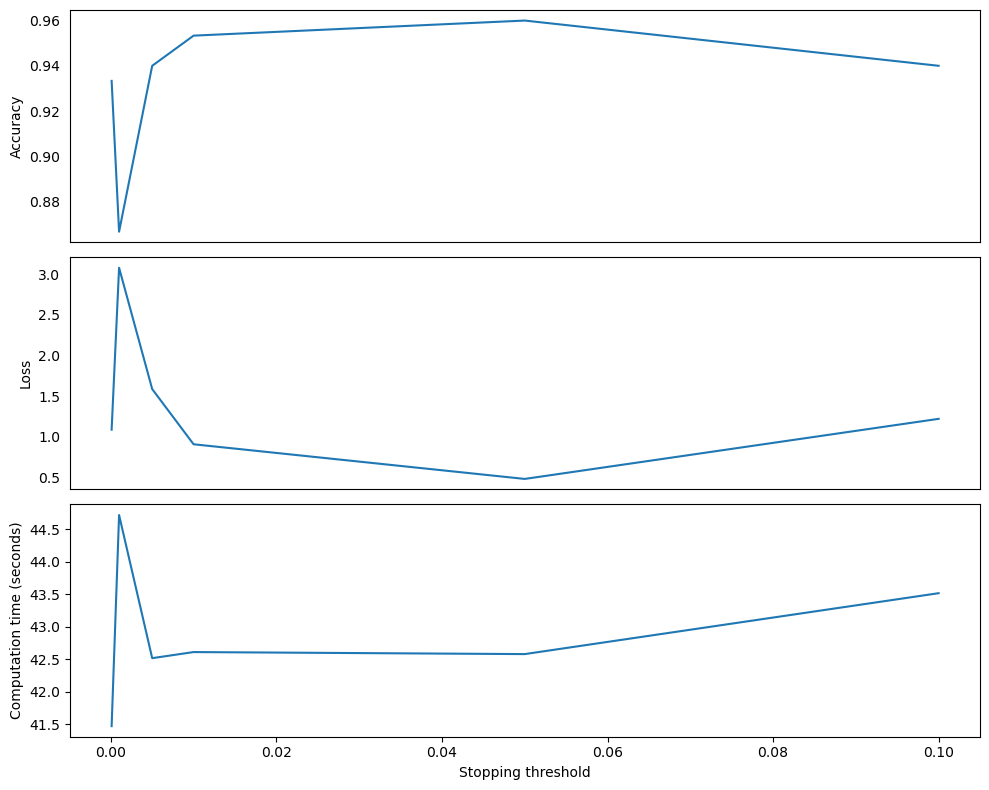

In [17]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Stopping threshold"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Stopping threshold"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Stopping threshold"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Stopping threshold")

plt.tight_layout() 

<Figure size 640x480 with 0 Axes>

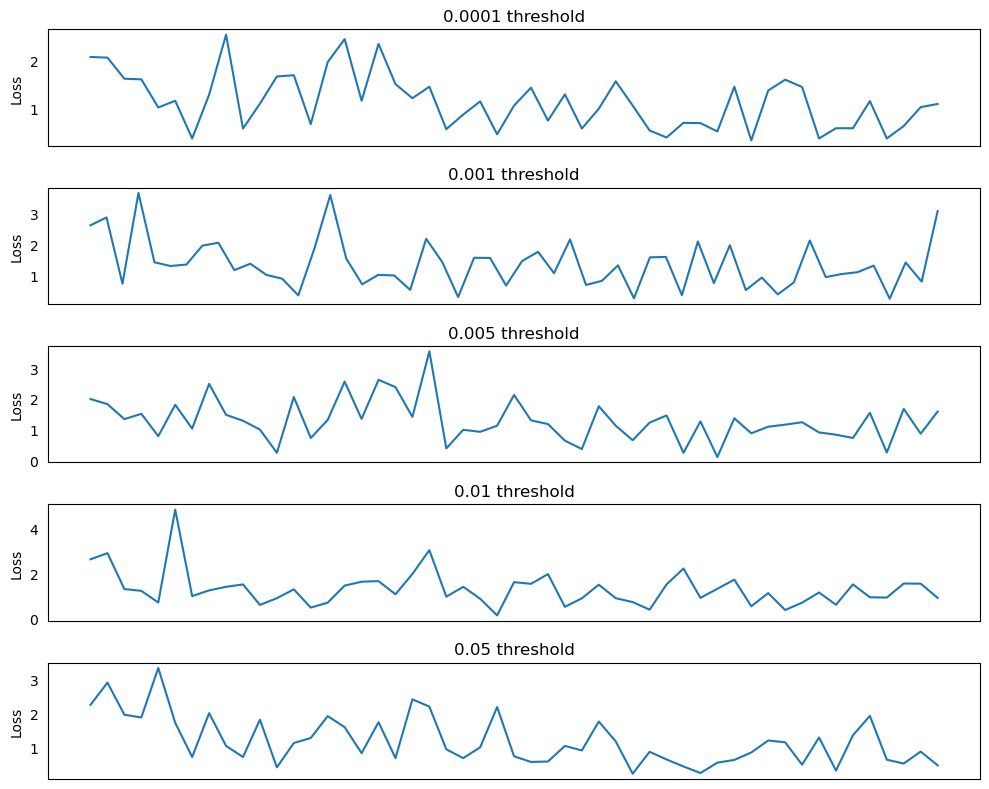

In [18]:
#Create 5 plots
plt.figure()
fig, axes = plt.subplots(5, 1, figsize=(10, 8))

for ax, loss_list, name in zip(axes.flatten(), model_info["Loss list"], model_info["Stopping threshold"]):
    ax.plot(loss_list)
    ax.set(title="{} threshold".format(name))
    ax.set_xticklabels([])
    ax.tick_params(tick1On=False)
    ax.set_ylabel("Loss")
    
plt.tight_layout() 

In [19]:
#Create a dataframe for each activation function
relu_model_data = pd.DataFrame(columns=["Accuracy list", "Final accuracy", 
                                        "Loss list", "Final loss", 
                                        "Computation time (seconds)"])
sigmoid_model_data = pd.DataFrame(columns=["Accuracy list", "Final accuracy", 
                                           "Loss list", "Final loss", 
                                           "Computation time (seconds)"])

for i in range(10):
    model_1 = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.025, 
                          activation_function="relu", 
                          seed=i)

    start = process_time()
    accuracy_list, loss_list = model_1.fit(training_data_X, 
                                           training_data_Y, 
                                           epochs=25, batch_size=150, 
                                           stopping_threshold=-100, dropout_rate=0.2)
    end = process_time()
    
    relu_model_data.loc[relu_model_data.index.size] = [accuracy_list,
                                                       accuracy_list[len(accuracy_list)-1],
                                                       loss_list,
                                                       loss_list[len(loss_list)-1],
                                                       end - start]
    
    model_2 = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.025, 
                          activation_function="sigmoid", 
                          seed=i)

    start = process_time()
    accuracy_list, loss_list = model_2.fit(training_data_X, 
                                           training_data_Y, 
                                           epochs=25, batch_size=150, 
                                           stopping_threshold=-100, dropout_rate=0.2)
    end = process_time()
    
    sigmoid_model_data.loc[sigmoid_model_data.index.size] = [accuracy_list,
                                                             accuracy_list[len(accuracy_list)-1],
                                                             loss_list,
                                                             loss_list[len(loss_list)-1],
                                                             end - start]

Epoch: 1/25
Iteration: 100 Accuracy: 0.5800 Loss: 7.0400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7200 Loss: 4.6000 Computation time: 31.25ms
Iteration: 300 Accuracy: 0.7867 Loss: 4.5000 Computation time: 0.00ms
Epoch computation time: 2.12s

Epoch: 2/25
Iteration: 100 Accuracy: 0.7800 Loss: 3.8000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8467 Loss: 2.7733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 2.5133 Computation time: 62.50ms
Epoch computation time: 2.48s

Epoch: 3/25
Iteration: 100 Accuracy: 0.8467 Loss: 2.4533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8467 Loss: 2.5733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8600 Loss: 1.5667 Computation time: 0.00ms
Epoch computation time: 2.30s

Epoch: 4/25
Iteration: 100 Accuracy: 0.8467 Loss: 2.3600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8533 Loss: 2.7933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8333 Loss: 1.6333 Computation time: 0.00ms
Epoch computation

Iteration: 300 Accuracy: 0.5333 Loss: 8.0400 Computation time: 0.00ms
Epoch computation time: 2.64s

Epoch: 9/25
Iteration: 100 Accuracy: 0.5333 Loss: 6.5000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5667 Loss: 9.7133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 7.7200 Computation time: 0.00ms
Epoch computation time: 2.38s

Epoch: 10/25
Iteration: 100 Accuracy: 0.5467 Loss: 7.6733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5333 Loss: 9.8267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 10.0267 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 11/25
Iteration: 100 Accuracy: 0.4267 Loss: 12.0000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5667 Loss: 8.1867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 10.1667 Computation time: 0.00ms
Epoch computation time: 2.69s

Epoch: 12/25
Iteration: 100 Accuracy: 0.5267 Loss: 7.4333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 8.3400 Computa

Iteration: 100 Accuracy: 0.9067 Loss: 1.2533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8667 Loss: 2.5667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.8000 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 17/25
Iteration: 100 Accuracy: 0.9400 Loss: 0.6733 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.9000 Loss: 1.5067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9133 Loss: 1.5133 Computation time: 0.00ms
Epoch computation time: 2.55s

Epoch: 18/25
Iteration: 100 Accuracy: 0.8867 Loss: 2.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9400 Loss: 0.6867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 1.5733 Computation time: 93.75ms
Epoch computation time: 2.42s

Epoch: 19/25
Iteration: 100 Accuracy: 0.8933 Loss: 0.9200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.0200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8933 Loss: 1.3133 Computation time: 0.00ms
Epoch computation time: 2.

Iteration: 300 Accuracy: 0.5067 Loss: 7.6400 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 24/25
Iteration: 100 Accuracy: 0.5067 Loss: 7.2867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5333 Loss: 7.9067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5200 Loss: 10.5733 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 25/25
Iteration: 100 Accuracy: 0.4533 Loss: 10.2400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5667 Loss: 6.7800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5933 Loss: 8.8333 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 1/25
Iteration: 100 Accuracy: 0.5600 Loss: 9.2400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7400 Loss: 5.5067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7733 Loss: 3.6133 Computation time: 0.00ms
Epoch computation time: 2.42s

Epoch: 2/25
Iteration: 100 Accuracy: 0.8400 Loss: 3.2400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8333 Loss: 3.2267 Computati

Iteration: 100 Accuracy: 0.5600 Loss: 8.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 6.2000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5067 Loss: 10.5000 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 7/25
Iteration: 100 Accuracy: 0.5533 Loss: 8.7200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 8.9667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5333 Loss: 7.2333 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 8/25
Iteration: 100 Accuracy: 0.5400 Loss: 7.2933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5333 Loss: 7.8467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 9.0133 Computation time: 93.75ms
Epoch computation time: 2.38s

Epoch: 9/25
Iteration: 100 Accuracy: 0.5867 Loss: 8.5133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4733 Loss: 7.7533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 8.6267 Computation time: 0.00ms
Epoch computation time: 2.33s

Iteration: 300 Accuracy: 0.8867 Loss: 1.6067 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 14/25
Iteration: 100 Accuracy: 0.8667 Loss: 1.7533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9000 Loss: 1.6667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9200 Loss: 1.1200 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 15/25
Iteration: 100 Accuracy: 0.8933 Loss: 1.1000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9000 Loss: 1.4467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8933 Loss: 1.5200 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 16/25
Iteration: 100 Accuracy: 0.9067 Loss: 1.9600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8800 Loss: 2.9000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 2.6867 Computation time: 0.00ms
Epoch computation time: 2.34s

Epoch: 17/25
Iteration: 100 Accuracy: 0.8600 Loss: 2.3933 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.8933 Loss: 1.7467 Computat

Iteration: 200 Accuracy: 0.5133 Loss: 8.8933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 9.1400 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 22/25
Iteration: 100 Accuracy: 0.5533 Loss: 8.2733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 8.8333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5600 Loss: 8.6733 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 23/25
Iteration: 100 Accuracy: 0.6200 Loss: 6.1600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5133 Loss: 10.0733 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5867 Loss: 7.1467 Computation time: 0.00ms
Epoch computation time: 2.41s

Epoch: 24/25
Iteration: 100 Accuracy: 0.4667 Loss: 8.8800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 8.4533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4867 Loss: 11.3933 Computation time: 78.12ms
Epoch computation time: 2.58s

Epoch: 25/25
Iteration: 100 Accuracy: 0.5200 Loss: 9.1133 Compu

Iteration: 300 Accuracy: 0.6533 Loss: 6.1067 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 4/25
Iteration: 100 Accuracy: 0.6533 Loss: 6.3200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6067 Loss: 6.3000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6533 Loss: 6.5667 Computation time: 0.00ms
Epoch computation time: 2.62s

Epoch: 5/25
Iteration: 100 Accuracy: 0.5533 Loss: 8.8000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6667 Loss: 6.0733 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.6333 Loss: 6.5800 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 6/25
Iteration: 100 Accuracy: 0.5733 Loss: 7.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 8.4400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5333 Loss: 7.7067 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 7/25
Iteration: 100 Accuracy: 0.5000 Loss: 9.1533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 7.5933 Computation 

Iteration: 100 Accuracy: 0.8667 Loss: 2.0867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.2600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8400 Loss: 1.8800 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 12/25
Iteration: 100 Accuracy: 0.8867 Loss: 1.8200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 2.2600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.2867 Computation time: 0.00ms
Epoch computation time: 2.36s

Epoch: 13/25
Iteration: 100 Accuracy: 0.8733 Loss: 1.5000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9467 Loss: 0.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9400 Loss: 0.9000 Computation time: 0.00ms
Epoch computation time: 2.41s

Epoch: 14/25
Iteration: 100 Accuracy: 0.9000 Loss: 1.6000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9133 Loss: 1.0933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8667 Loss: 2.0533 Computation time: 0.00ms
Epoch computation time: 2.47

Iteration: 300 Accuracy: 0.4600 Loss: 6.9467 Computation time: 0.00ms
Epoch computation time: 2.64s

Epoch: 19/25
Iteration: 100 Accuracy: 0.5000 Loss: 8.2733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 6.2267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4333 Loss: 10.1133 Computation time: 0.00ms
Epoch computation time: 2.36s

Epoch: 20/25
Iteration: 100 Accuracy: 0.5267 Loss: 7.9600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 7.3467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5067 Loss: 9.3067 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 21/25
Iteration: 100 Accuracy: 0.5333 Loss: 6.9267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4933 Loss: 8.7333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4733 Loss: 7.6133 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 22/25
Iteration: 100 Accuracy: 0.5333 Loss: 6.5067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5200 Loss: 6.9533 Computat

Iteration: 200 Accuracy: 0.5467 Loss: 8.7667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5800 Loss: 6.8067 Computation time: 0.00ms
Epoch computation time: 2.42s

Epoch: 2/25
Iteration: 100 Accuracy: 0.7067 Loss: 4.1467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 6.3067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6467 Loss: 5.5067 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 3/25
Iteration: 100 Accuracy: 0.6200 Loss: 5.2800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6600 Loss: 7.7867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6800 Loss: 5.4400 Computation time: 0.00ms
Epoch computation time: 2.55s

Epoch: 4/25
Iteration: 100 Accuracy: 0.6200 Loss: 5.7333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 8.1000 Computation time: 62.50ms
Iteration: 300 Accuracy: 0.4933 Loss: 7.9067 Computation time: 0.00ms
Epoch computation time: 2.41s

Epoch: 5/25
Iteration: 100 Accuracy: 0.5067 Loss: 9.9800 Computation 

Iteration: 100 Accuracy: 0.9200 Loss: 1.5200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8800 Loss: 1.9733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.6533 Computation time: 0.00ms
Epoch computation time: 2.75s

Epoch: 10/25
Iteration: 100 Accuracy: 0.8933 Loss: 1.9800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 1.3333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8733 Loss: 1.6800 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 11/25
Iteration: 100 Accuracy: 0.9133 Loss: 1.5333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9267 Loss: 1.0533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.4800 Computation time: 0.00ms
Epoch computation time: 2.36s

Epoch: 12/25
Iteration: 100 Accuracy: 0.8933 Loss: 1.3933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8933 Loss: 2.2933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9133 Loss: 2.0133 Computation time: 0.00ms
Epoch computation time: 2.27

Iteration: 300 Accuracy: 0.5867 Loss: 7.5867 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 17/25
Iteration: 100 Accuracy: 0.4933 Loss: 9.7600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4800 Loss: 10.0067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 9.2933 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 18/25
Iteration: 100 Accuracy: 0.5200 Loss: 7.3667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4800 Loss: 6.9200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 7.7733 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 19/25
Iteration: 100 Accuracy: 0.5533 Loss: 12.9400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 7.2467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 6.5533 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 20/25
Iteration: 100 Accuracy: 0.5000 Loss: 7.7867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4533 Loss: 7.2067 Computa

Iteration: 100 Accuracy: 0.8800 Loss: 2.0533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9400 Loss: 0.7933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8733 Loss: 2.0733 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 25/25
Iteration: 100 Accuracy: 0.8733 Loss: 2.6133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8933 Loss: 1.4667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8733 Loss: 2.6200 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 1/25
Iteration: 100 Accuracy: 0.4467 Loss: 10.2467 Computation time: 62.50ms
Iteration: 200 Accuracy: 0.6933 Loss: 4.1667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.7067 Loss: 6.3533 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 2/25
Iteration: 100 Accuracy: 0.6667 Loss: 5.7267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6867 Loss: 7.3133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5800 Loss: 6.1200 Computation time: 93.75ms
Epoch computation time: 2.6

Iteration: 300 Accuracy: 0.8800 Loss: 2.5267 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 7/25
Iteration: 100 Accuracy: 0.9267 Loss: 1.0867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8933 Loss: 1.7133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8600 Loss: 2.5067 Computation time: 0.00ms
Epoch computation time: 2.08s

Epoch: 8/25
Iteration: 100 Accuracy: 0.8000 Loss: 3.4867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 1.4333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9000 Loss: 1.9533 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 9/25
Iteration: 100 Accuracy: 0.9067 Loss: 0.8800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 1.5667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8667 Loss: 1.6400 Computation time: 0.00ms
Epoch computation time: 2.61s

Epoch: 10/25
Iteration: 100 Accuracy: 0.8867 Loss: 2.1200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8933 Loss: 1.7000 Computation 

Iteration: 100 Accuracy: 0.5067 Loss: 9.6667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 6.5733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 9.2800 Computation time: 0.00ms
Epoch computation time: 2.64s

Epoch: 15/25
Iteration: 100 Accuracy: 0.5067 Loss: 9.3000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5200 Loss: 7.7600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 7.3800 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 16/25
Iteration: 100 Accuracy: 0.5667 Loss: 7.4200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4933 Loss: 9.8867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4533 Loss: 11.0867 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 17/25
Iteration: 100 Accuracy: 0.5200 Loss: 10.2733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5800 Loss: 8.2333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 7.3933 Computation time: 0.00ms
Epoch computation time: 2.

Text(0, 0.5, 'Loss')

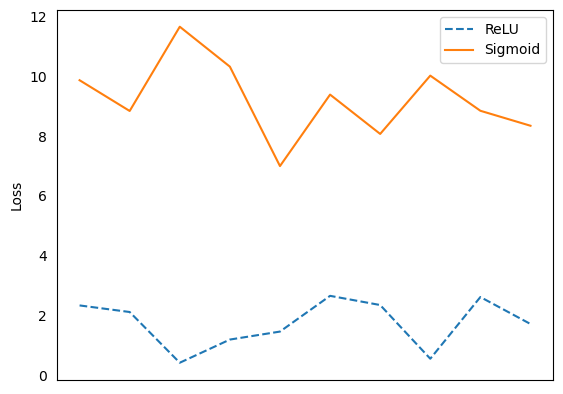

In [20]:
plt.figure()

#Display line chart for each algorithm
plt.plot(relu_model_data["Final loss"], ls='--', label='ReLU')
plt.plot(sigmoid_model_data["Final loss"], ls='-', label='Sigmoid')

#Display legend
plt.legend()

#Set x tick labels off
ax = plt.gca()
ax.set_xticklabels([])
ax.tick_params(tick1On=False)
ax.set_ylabel("Loss")

In [21]:
sigmoid_model_data = pd.DataFrame(columns=["Accuracy list", "Final accuracy", 
                                           "Loss list", "Final loss", 
                                           "Computation time (seconds)"])

for i in range(5):
    model = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.025, 
                          activation_function="sigmoid", 
                          seed=i)

    start = process_time()
    accuracy_list, loss_list = model.fit(training_data_X, 
                                           training_data_Y, 
                                           epochs=100, batch_size=150, 
                                           stopping_threshold=-100, dropout_rate=0.2)
    end = process_time()
    
    sigmoid_model_data.loc[sigmoid_model_data.index.size] = [accuracy_list,
                                                             accuracy_list[len(accuracy_list)-1],
                                                             loss_list,
                                                             loss_list[len(loss_list)-1],
                                                             end - start]

Epoch: 1/100
Iteration: 100 Accuracy: 0.2533 Loss: 8.5533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 7.9533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6600 Loss: 5.7267 Computation time: 0.00ms
Epoch computation time: 2.08s

Epoch: 2/100
Iteration: 100 Accuracy: 0.6133 Loss: 7.9400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6467 Loss: 6.6733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6467 Loss: 3.5067 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 3/100
Iteration: 100 Accuracy: 0.6133 Loss: 7.4200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6200 Loss: 6.3733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6000 Loss: 6.5467 Computation time: 0.00ms
Epoch computation time: 2.59s

Epoch: 4/100
Iteration: 100 Accuracy: 0.6000 Loss: 7.1800 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.5867 Loss: 7.4133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 10.4067 Computation time: 0.00ms
Epoch computa

Iteration: 100 Accuracy: 0.5133 Loss: 10.1800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 7.5000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 7.3667 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 34/100
Iteration: 100 Accuracy: 0.5067 Loss: 7.5200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5067 Loss: 7.5867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 10.5467 Computation time: 93.75ms
Epoch computation time: 2.64s

Epoch: 35/100
Iteration: 100 Accuracy: 0.5133 Loss: 6.4400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 11.0600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.3933 Loss: 15.9267 Computation time: 78.12ms
Epoch computation time: 2.64s

Epoch: 36/100
Iteration: 100 Accuracy: 0.5067 Loss: 11.1533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4400 Loss: 13.3400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 8.7533 Computation time: 0.00ms
Epoch computation

Iteration: 100 Accuracy: 0.4933 Loss: 7.1067 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.5067 Loss: 7.5267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4600 Loss: 11.8333 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 66/100
Iteration: 100 Accuracy: 0.4667 Loss: 7.6400 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.4667 Loss: 7.7733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4667 Loss: 9.5333 Computation time: 0.00ms
Epoch computation time: 2.59s

Epoch: 67/100
Iteration: 100 Accuracy: 0.4667 Loss: 7.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4800 Loss: 8.3000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5333 Loss: 10.3800 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 68/100
Iteration: 100 Accuracy: 0.4933 Loss: 10.1533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4133 Loss: 8.3467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5533 Loss: 9.2200 Computation time: 0.00ms
Epoch computation ti

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-inputs))


Iteration: 300 Accuracy: 0.5000 Loss: 7.5067 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 76/100
Iteration: 100 Accuracy: 0.4733 Loss: 13.8467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 10.4333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 8.0600 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 77/100
Iteration: 100 Accuracy: 0.4800 Loss: 13.3667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5200 Loss: 6.5333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 7.8533 Computation time: 93.75ms
Epoch computation time: 2.59s

Epoch: 78/100
Iteration: 100 Accuracy: 0.5200 Loss: 8.1733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 11.6533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4733 Loss: 8.0733 Computation time: 0.00ms
Epoch computation time: 2.67s

Epoch: 79/100
Iteration: 100 Accuracy: 0.4867 Loss: 7.1267 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 6.7600 

Iteration: 300 Accuracy: 0.5933 Loss: 6.9133 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 8/100
Iteration: 100 Accuracy: 0.5400 Loss: 8.6200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6000 Loss: 7.3933 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.5133 Loss: 10.9733 Computation time: 0.00ms
Epoch computation time: 2.62s

Epoch: 9/100
Iteration: 100 Accuracy: 0.5733 Loss: 9.2933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4867 Loss: 8.5600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5200 Loss: 9.2067 Computation time: 0.00ms
Epoch computation time: 2.30s

Epoch: 10/100
Iteration: 100 Accuracy: 0.5333 Loss: 9.8133 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.4667 Loss: 8.5667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4200 Loss: 9.7067 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 11/100
Iteration: 100 Accuracy: 0.5067 Loss: 7.8933 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.5533 Loss: 9.1667 Com

Iteration: 100 Accuracy: 0.5400 Loss: 6.8400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4933 Loss: 6.4200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4733 Loss: 9.2600 Computation time: 0.00ms
Epoch computation time: 2.69s

Epoch: 41/100
Iteration: 100 Accuracy: 0.4467 Loss: 13.6133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 10.1533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4867 Loss: 8.2067 Computation time: 0.00ms
Epoch computation time: 2.77s

Epoch: 42/100
Iteration: 100 Accuracy: 0.5267 Loss: 6.6733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 6.4800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 11.8600 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 43/100
Iteration: 100 Accuracy: 0.5267 Loss: 12.0867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 8.4267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4733 Loss: 7.3333 Computation time: 0.00ms
Epoch computation tim

Iteration: 100 Accuracy: 0.5600 Loss: 6.7333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 12.4000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4667 Loss: 13.5533 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 73/100
Iteration: 100 Accuracy: 0.5467 Loss: 7.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5867 Loss: 8.1600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4867 Loss: 12.9267 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 74/100
Iteration: 100 Accuracy: 0.4867 Loss: 8.2800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5533 Loss: 11.8667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 7.2533 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 75/100
Iteration: 100 Accuracy: 0.4667 Loss: 8.0800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4867 Loss: 8.9867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 11.2800 Computation time: 0.00ms
Epoch computation ti

Iteration: 100 Accuracy: 0.6800 Loss: 4.4000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6467 Loss: 4.8333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6200 Loss: 7.3800 Computation time: 31.25ms
Epoch computation time: 2.47s

Epoch: 5/100
Iteration: 100 Accuracy: 0.5867 Loss: 8.3200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6533 Loss: 5.3200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5867 Loss: 8.0067 Computation time: 0.00ms
Epoch computation time: 2.39s

Epoch: 6/100
Iteration: 100 Accuracy: 0.5600 Loss: 8.1067 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 6.2000 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5067 Loss: 10.5000 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 7/100
Iteration: 100 Accuracy: 0.5533 Loss: 8.7200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5933 Loss: 8.9667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5333 Loss: 7.2333 Computation time: 0.00ms
Epoch computation time: 2.

Iteration: 300 Accuracy: 0.5133 Loss: 7.4467 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 37/100
Iteration: 100 Accuracy: 0.5200 Loss: 9.8733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 6.5200 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.5933 Loss: 6.4467 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 38/100
Iteration: 100 Accuracy: 0.5133 Loss: 10.5400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5200 Loss: 7.8600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4467 Loss: 9.2600 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 39/100
Iteration: 100 Accuracy: 0.5533 Loss: 7.2667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5067 Loss: 7.9800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 11.8467 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 40/100
Iteration: 100 Accuracy: 0.5200 Loss: 7.9667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4733 Loss: 9.8800 Co

Iteration: 300 Accuracy: 0.4867 Loss: 8.8933 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 69/100
Iteration: 100 Accuracy: 0.4800 Loss: 8.7467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4733 Loss: 10.5400 Computation time: 46.88ms
Iteration: 300 Accuracy: 0.5267 Loss: 6.8933 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 70/100
Iteration: 100 Accuracy: 0.4400 Loss: 10.5800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5667 Loss: 7.5933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4867 Loss: 9.7533 Computation time: 0.00ms
Epoch computation time: 2.55s

Epoch: 71/100
Iteration: 100 Accuracy: 0.5800 Loss: 11.3733 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5800 Loss: 6.5133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5400 Loss: 7.9600 Computation time: 0.00ms
Epoch computation time: 2.84s

Epoch: 72/100
Iteration: 100 Accuracy: 0.5200 Loss: 7.7467 Computation time: 78.12ms
Iteration: 200 Accuracy: 0.5267 Loss: 9.3867 

Iteration: 300 Accuracy: 0.4400 Loss: 11.7533 Computation time: 0.00ms
Epoch computation time: 2.70s

Epoch: 1/100
Iteration: 100 Accuracy: 0.3333 Loss: 6.8200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5800 Loss: 7.3400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5933 Loss: 5.3333 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 2/100
Iteration: 100 Accuracy: 0.6733 Loss: 6.0000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6933 Loss: 4.2733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6200 Loss: 7.0467 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 3/100
Iteration: 100 Accuracy: 0.6867 Loss: 4.4600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.6267 Loss: 5.2867 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6400 Loss: 5.1200 Computation time: 0.00ms
Epoch computation time: 2.59s

Epoch: 4/100
Iteration: 100 Accuracy: 0.6733 Loss: 6.5000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5733 Loss: 8.0733 Computat

Iteration: 100 Accuracy: 0.5000 Loss: 8.5200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 8.4933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 7.5533 Computation time: 0.00ms
Epoch computation time: 2.38s

Epoch: 34/100
Iteration: 100 Accuracy: 0.5400 Loss: 7.8600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5200 Loss: 7.8133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5133 Loss: 7.0867 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 35/100
Iteration: 100 Accuracy: 0.4467 Loss: 8.2000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5000 Loss: 8.7800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 8.1533 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 36/100
Iteration: 100 Accuracy: 0.5000 Loss: 8.1000 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.5067 Loss: 7.6800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4467 Loss: 7.9467 Computation time: 0.00ms
Epoch computation time: 

Iteration: 300 Accuracy: 0.4533 Loss: 7.0200 Computation time: 0.00ms
Epoch computation time: 2.53s

Epoch: 66/100
Iteration: 100 Accuracy: 0.5867 Loss: 7.4600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5133 Loss: 11.4267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 9.7267 Computation time: 0.00ms
Epoch computation time: 2.67s

Epoch: 67/100
Iteration: 100 Accuracy: 0.5267 Loss: 8.0400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4467 Loss: 9.3067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4800 Loss: 8.6800 Computation time: 0.00ms
Epoch computation time: 2.48s

Epoch: 68/100
Iteration: 100 Accuracy: 0.5000 Loss: 6.7200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 6.8467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4667 Loss: 9.0067 Computation time: 0.00ms
Epoch computation time: 2.70s

Epoch: 69/100
Iteration: 100 Accuracy: 0.4600 Loss: 11.3333 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4733 Loss: 10.5867 Co

Iteration: 100 Accuracy: 0.5067 Loss: 7.1200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5400 Loss: 6.7267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4200 Loss: 7.7867 Computation time: 0.00ms
Epoch computation time: 2.70s

Epoch: 99/100
Iteration: 100 Accuracy: 0.4467 Loss: 8.8600 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4933 Loss: 9.6667 Computation time: 93.75ms
Iteration: 300 Accuracy: 0.5467 Loss: 9.5333 Computation time: 0.00ms
Epoch computation time: 2.66s

Epoch: 100/100
Iteration: 100 Accuracy: 0.5133 Loss: 6.7667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5800 Loss: 6.6533 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5200 Loss: 9.0733 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 1/100
Iteration: 100 Accuracy: 0.3733 Loss: 6.7667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4667 Loss: 7.8400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.6000 Loss: 5.8867 Computation time: 62.50ms
Epoch computation time

Iteration: 300 Accuracy: 0.5067 Loss: 11.4067 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 31/100
Iteration: 100 Accuracy: 0.4867 Loss: 9.7867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4333 Loss: 10.7400 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5933 Loss: 6.9867 Computation time: 0.00ms
Epoch computation time: 2.47s

Epoch: 32/100
Iteration: 100 Accuracy: 0.4333 Loss: 8.6533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 7.7800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5067 Loss: 11.2267 Computation time: 0.00ms
Epoch computation time: 2.45s

Epoch: 33/100
Iteration: 100 Accuracy: 0.5133 Loss: 10.9200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4667 Loss: 11.4800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4200 Loss: 9.4267 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 34/100
Iteration: 100 Accuracy: 0.6267 Loss: 5.1800 Computation time: 93.75ms
Iteration: 200 Accuracy: 0.4867 Loss: 8.406

Iteration: 300 Accuracy: 0.5067 Loss: 9.1467 Computation time: 0.00ms
Epoch computation time: 2.56s

Epoch: 63/100
Iteration: 100 Accuracy: 0.5267 Loss: 8.8800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5600 Loss: 7.9200 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 11.6000 Computation time: 0.00ms
Epoch computation time: 2.50s

Epoch: 64/100
Iteration: 100 Accuracy: 0.4200 Loss: 12.4800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4800 Loss: 8.0267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4867 Loss: 11.7933 Computation time: 0.00ms
Epoch computation time: 2.66s

Epoch: 65/100
Iteration: 100 Accuracy: 0.5200 Loss: 6.3533 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5533 Loss: 9.9067 Computation time: 78.12ms
Iteration: 300 Accuracy: 0.5133 Loss: 12.3800 Computation time: 0.00ms
Epoch computation time: 2.55s

Epoch: 66/100
Iteration: 100 Accuracy: 0.4600 Loss: 10.7800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4867 Loss: 11.133

C:\Users\bambi\Documents\IN3063-CW\src\neural_network.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-inputs))


Iteration: 300 Accuracy: 0.4667 Loss: 12.2133 Computation time: 93.75ms
Epoch computation time: 2.75s

Epoch: 82/100
Iteration: 100 Accuracy: 0.5267 Loss: 9.1200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4733 Loss: 8.7733 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4400 Loss: 11.9267 Computation time: 0.00ms
Epoch computation time: 2.36s

Epoch: 83/100
Iteration: 100 Accuracy: 0.4467 Loss: 12.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4267 Loss: 15.5533 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5600 Loss: 7.7600 Computation time: 0.00ms
Epoch computation time: 2.91s

Epoch: 84/100
Iteration: 100 Accuracy: 0.5267 Loss: 11.0667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4200 Loss: 9.4467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5400 Loss: 7.8867 Computation time: 0.00ms
Epoch computation time: 2.61s

Epoch: 85/100
Iteration: 100 Accuracy: 0.5200 Loss: 10.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4667 Loss: 12.18

Text(0, 0.5, 'Loss')

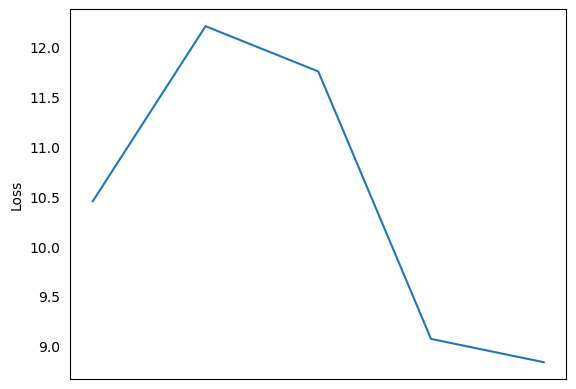

In [22]:
plt.figure()

plt.plot(sigmoid_model_data["Final loss"], ls='-', label='Sigmoid')

#Set x tick labels off
ax = plt.gca()
ax.set_xticklabels([])
ax.tick_params(tick1On=False)
ax.set_ylabel("Loss")

In [23]:
model_1 = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.025, 
                          activation_function="relu", 
                          seed=i)

model_1.fit(training_data_X,
            training_data_Y, 
            epochs=50, batch_size=150, 
            stopping_threshold=-100, dropout_rate=0.2)

relu_predictions = model_1.predict(testing_data_X)


model_2 = NeuralNetwork(hidden_layers_amount=1, 
                          hidden_nodes_amount=25, 
                          learning_rate=0.025, 
                          activation_function="sigmoid", 
                          seed=i)

model_2.fit(training_data_X,
            training_data_Y, 
            epochs=50, batch_size=150, 
            stopping_threshold=-100, dropout_rate=0.2)

sigmoid_predictions = model_2.predict(testing_data_X)

Epoch: 1/50
Iteration: 100 Accuracy: 0.6000 Loss: 6.1667 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.7400 Loss: 4.5600 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8000 Loss: 4.4533 Computation time: 0.00ms
Epoch computation time: 1.97s

Epoch: 2/50
Iteration: 100 Accuracy: 0.7800 Loss: 4.2800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8400 Loss: 2.8067 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8200 Loss: 3.2000 Computation time: 0.00ms
Epoch computation time: 2.59s

Epoch: 3/50
Iteration: 100 Accuracy: 0.9067 Loss: 1.4867 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8667 Loss: 2.6133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8800 Loss: 1.5800 Computation time: 0.00ms
Epoch computation time: 2.73s

Epoch: 4/50
Iteration: 100 Accuracy: 0.8533 Loss: 1.6933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8333 Loss: 2.4933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.8800 Loss: 1.9267 Computation time: 0.00ms
Epoch computation t

Iteration: 300 Accuracy: 0.8933 Loss: 2.4467 Computation time: 0.00ms
Epoch computation time: 2.44s

Epoch: 34/50
Iteration: 100 Accuracy: 0.9267 Loss: 1.2467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8667 Loss: 2.5267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9067 Loss: 1.9733 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 35/50
Iteration: 100 Accuracy: 0.9000 Loss: 1.9000 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8733 Loss: 2.5400 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9333 Loss: 0.7333 Computation time: 0.00ms
Epoch computation time: 2.41s

Epoch: 36/50
Iteration: 100 Accuracy: 0.9267 Loss: 1.3467 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.8867 Loss: 1.6133 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.9200 Loss: 1.1600 Computation time: 0.00ms
Epoch computation time: 2.33s

Epoch: 37/50
Iteration: 100 Accuracy: 0.9200 Loss: 1.2400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.9200 Loss: 1.3000 Computati

Iteration: 100 Accuracy: 0.4867 Loss: 7.6133 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4800 Loss: 7.5467 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5000 Loss: 6.8667 Computation time: 0.00ms
Epoch computation time: 2.80s

Epoch: 17/50
Iteration: 100 Accuracy: 0.5333 Loss: 5.5400 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5267 Loss: 6.3333 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5067 Loss: 8.1400 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 18/50
Iteration: 100 Accuracy: 0.4733 Loss: 7.1800 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4600 Loss: 7.7267 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4933 Loss: 7.5933 Computation time: 0.00ms
Epoch computation time: 2.58s

Epoch: 19/50
Iteration: 100 Accuracy: 0.4867 Loss: 15.3933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4467 Loss: 11.0800 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5400 Loss: 7.3333 Computation time: 0.00ms
Epoch computation time: 2.

Iteration: 300 Accuracy: 0.5733 Loss: 11.4933 Computation time: 78.12ms
Epoch computation time: 2.55s

Epoch: 49/50
Iteration: 100 Accuracy: 0.5000 Loss: 12.0200 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.4067 Loss: 9.9933 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.5267 Loss: 7.4067 Computation time: 0.00ms
Epoch computation time: 2.52s

Epoch: 50/50
Iteration: 100 Accuracy: 0.5533 Loss: 10.1933 Computation time: 0.00ms
Iteration: 200 Accuracy: 0.5067 Loss: 8.3667 Computation time: 0.00ms
Iteration: 300 Accuracy: 0.4667 Loss: 12.8800 Computation time: 0.00ms
Epoch computation time: 2.61s



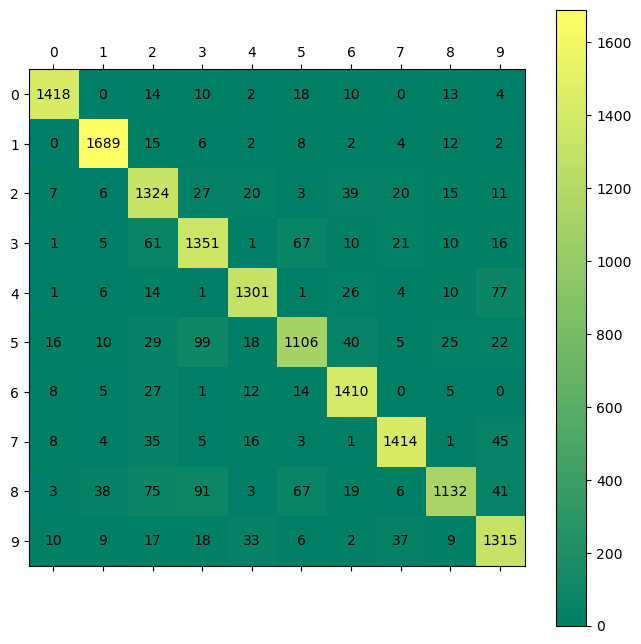

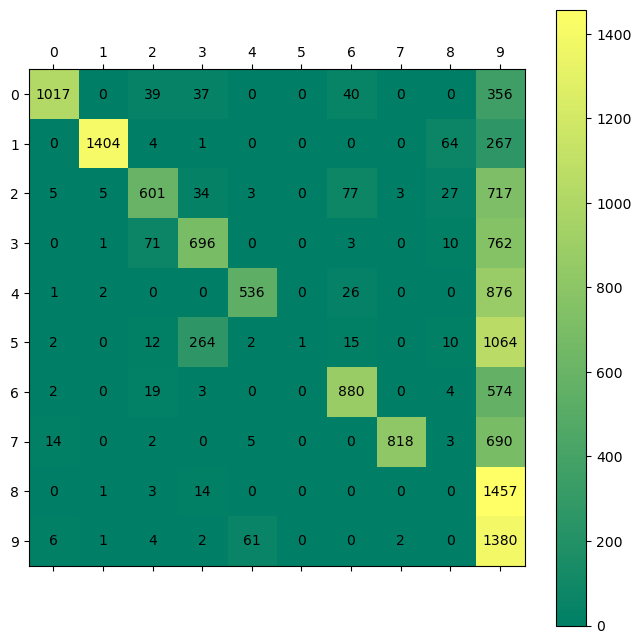

ReLU
Accuracy: 0.8973 Loss: 1.7318

Sigmoid
Accuracy: 0.4889 Loss: 11.3394


In [24]:
confusion_matrix(relu_predictions, testing_data_Y)

confusion_matrix(sigmoid_predictions, testing_data_Y)

print("ReLU\nAccuracy: {0:.4f}".format(calculate_accuracy(relu_predictions, testing_data_Y)), 
      "Loss: {0:.4f}".format(calculate_MSE(relu_predictions, testing_data_Y)))
print("\nSigmoid\nAccuracy: {0:.4f}".format(calculate_accuracy(sigmoid_predictions, testing_data_Y)), 
      "Loss: {0:.4f}".format(calculate_MSE(sigmoid_predictions, testing_data_Y)))